# <b><u> Project Title : Identification of major customer segments on a transactional dataset. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [1]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 150

In [2]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1_W3Jfp1bTWpPFmqyGgGXYJGd0rHIV8dD'

# Importing dataset to create a dataframe
dataset = pd.read_excel(url)

In [3]:
# Checking shape of dataframe
dataset.shape

(541909, 8)

In [4]:
# Checking top 5 records
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Checking bottom 5 records
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Checking all the columns present in the dataset
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Basic Info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Descriptive Statistics
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Checking number of unique values in each column
for col in dataset.columns:
  print(col,':',dataset[col].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


##**Data cleaning**

In [ ]:
# Missing data counts and percentage
missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing Data Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


1. **24.93%** of items purchases are not assigned to any customer
2. Hence there is no use of having the data with no customer assignment.
3.Because we can't form clusters without CustomerID so we will delete them from dataset.

In [ ]:
# Dropping the rows with nulls
dataset.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# Checking duplicates
print(len(dataset[dataset.duplicated()]))

5225


In [ ]:
# Dropping duplicate rows
dataset.drop_duplicates(inplace=True)

In [ ]:
# New Shape
dataset.shape

(401604, 8)

In [ ]:
# checking null counts and datatype in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


##**Feature Engineering**

In [ ]:
# Creating new features from the datetime column InvoiceDate
dataset["year"]  = dataset["InvoiceDate"].apply(lambda x: x.year)
dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month_name())
dataset['Day']   = dataset['InvoiceDate'].apply(lambda x: x.day_name())
dataset["hour"]  = dataset["InvoiceDate"].apply(lambda x: x.hour)

In [ ]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
dataset['TotalAmount'] = dataset['Quantity']*dataset['UnitPrice']

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
dataset['TimeType'] = np.where((dataset["hour"]>5)&(dataset["hour"]<18), np.where(
                           dataset["hour"]<12, 'Morning','Afternoon'),'Evening')

In [ ]:
# InvoiceNo starting with 'C' represents cancellation
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')
cancellations = dataset[dataset['InvoiceNo'].str.contains('C')]
cancellations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,hour,TotalAmount,TimeType
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,-19.80,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning


In [ ]:
# Dropping cancellations from the main dataframe
df = dataset[~dataset['InvoiceNo'].str.contains('C')]

## **EDA**

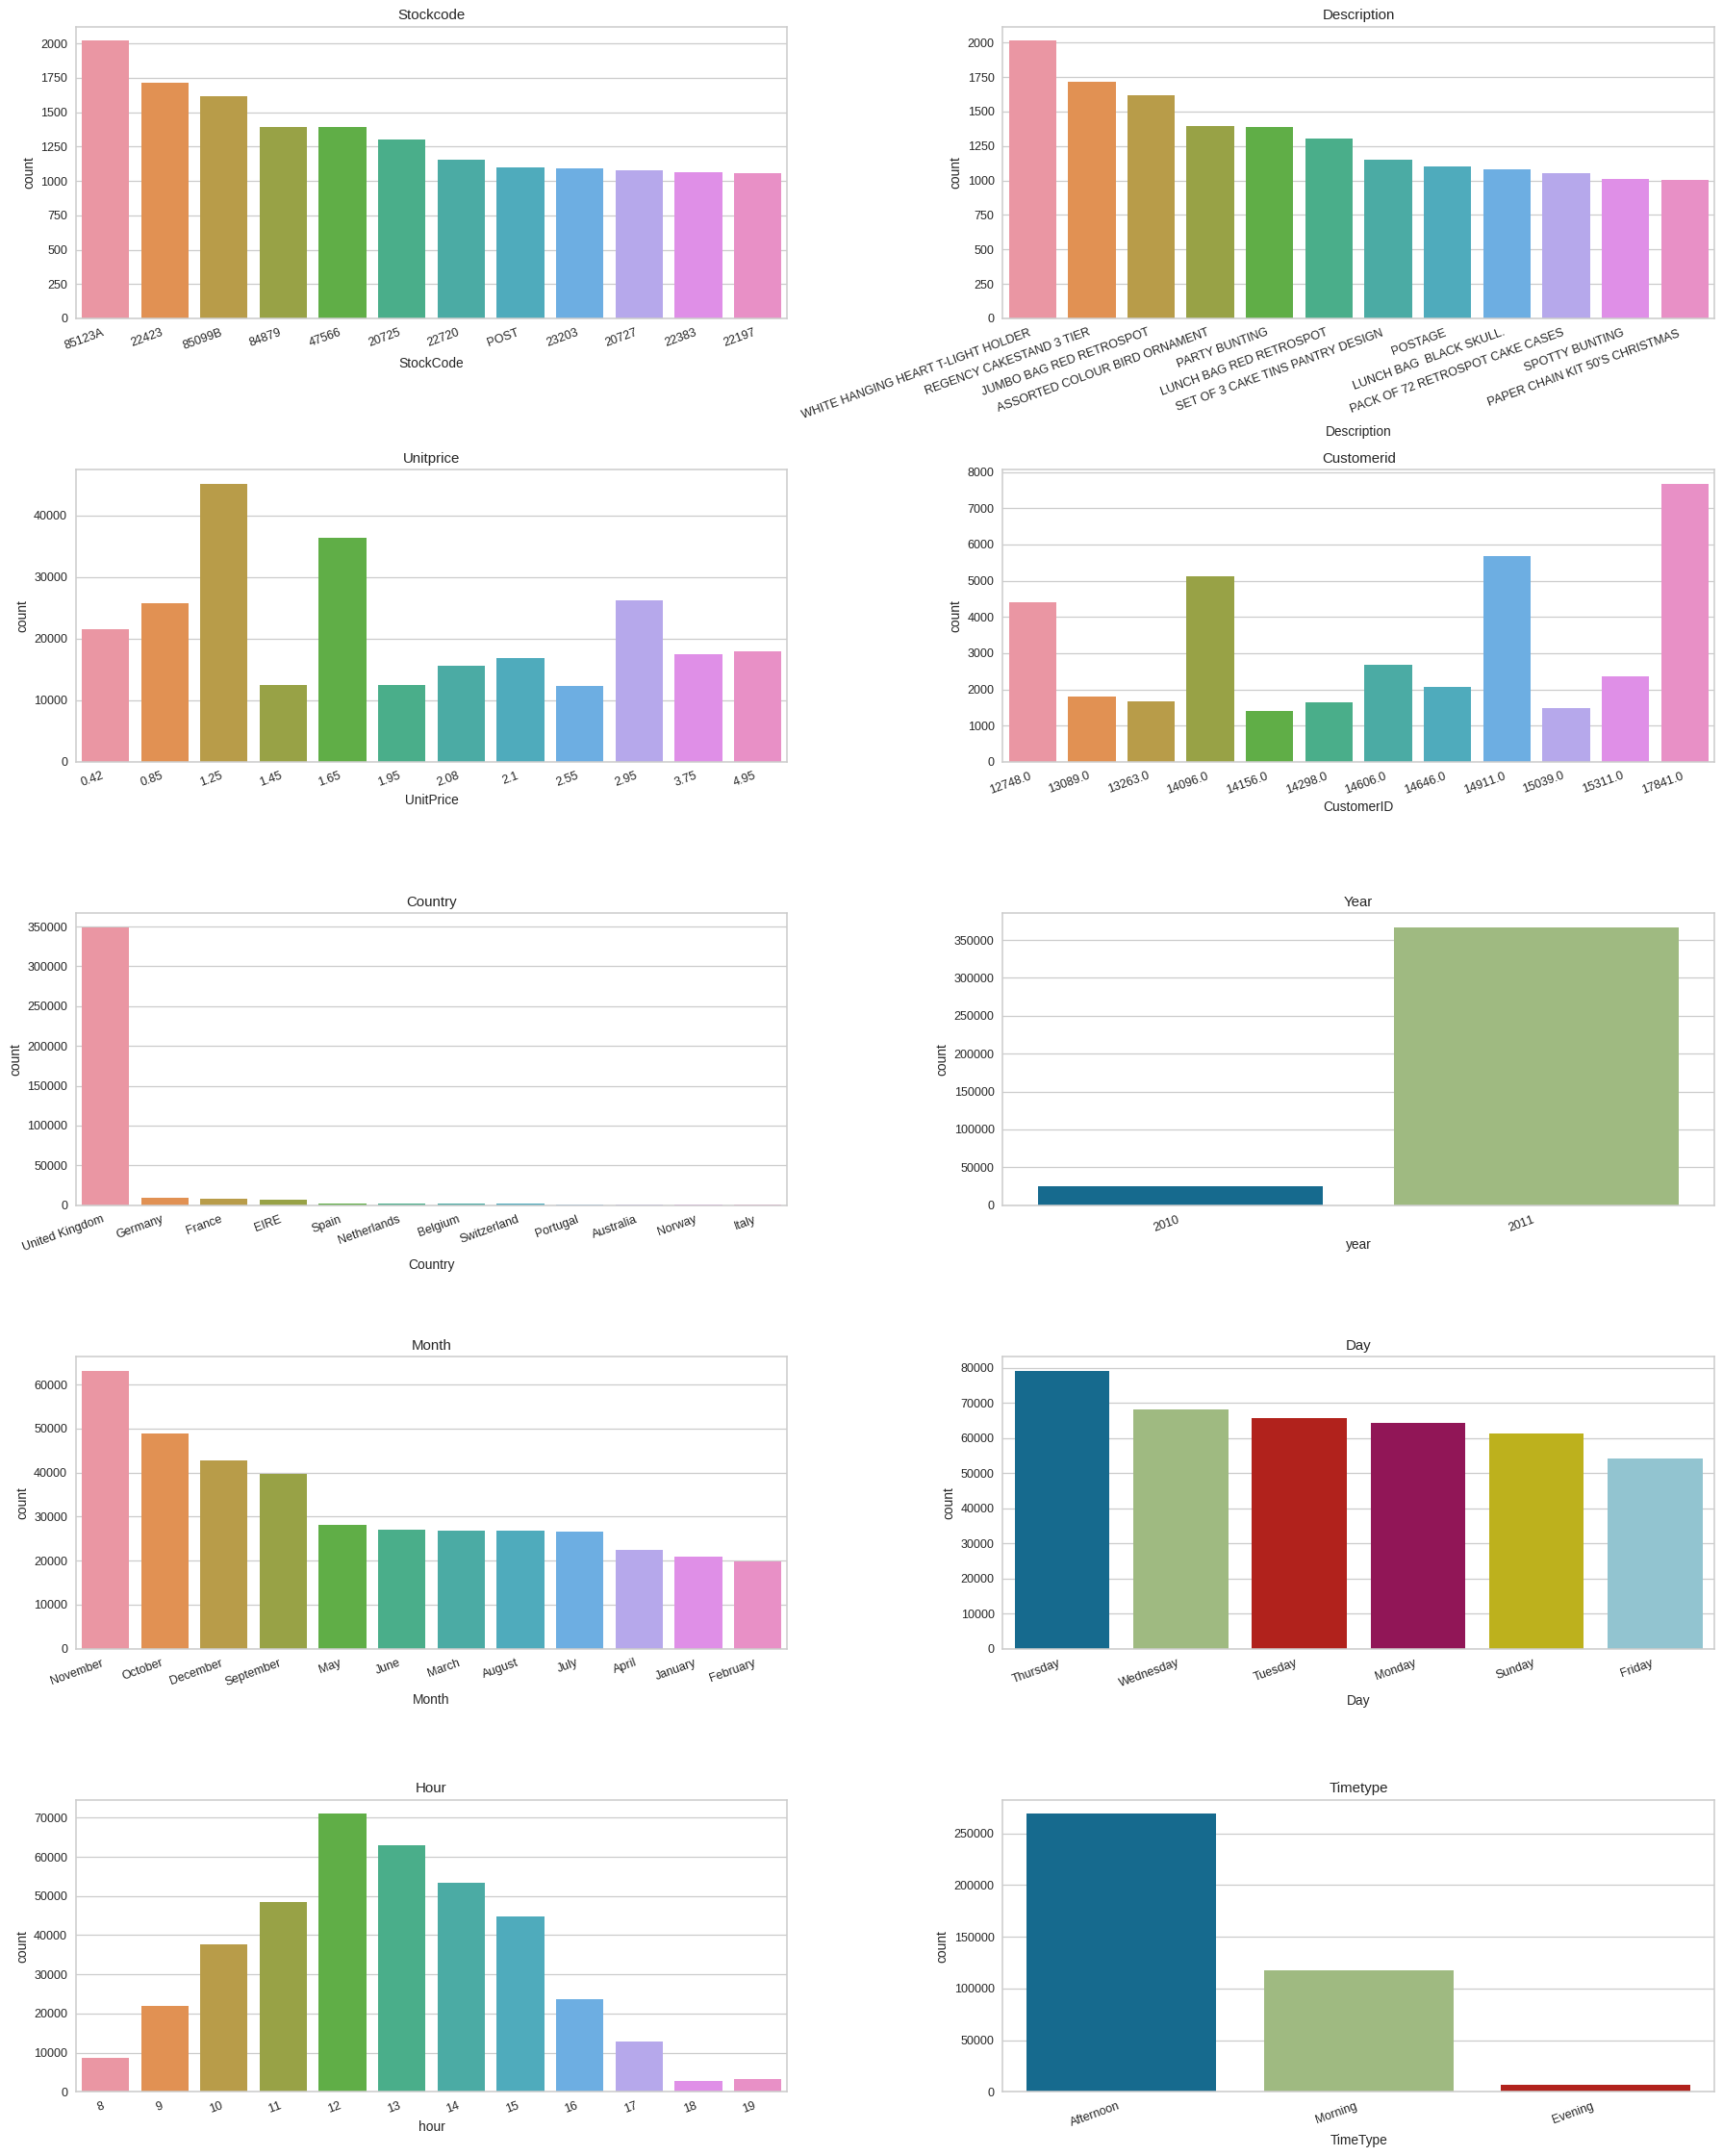

In [ ]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

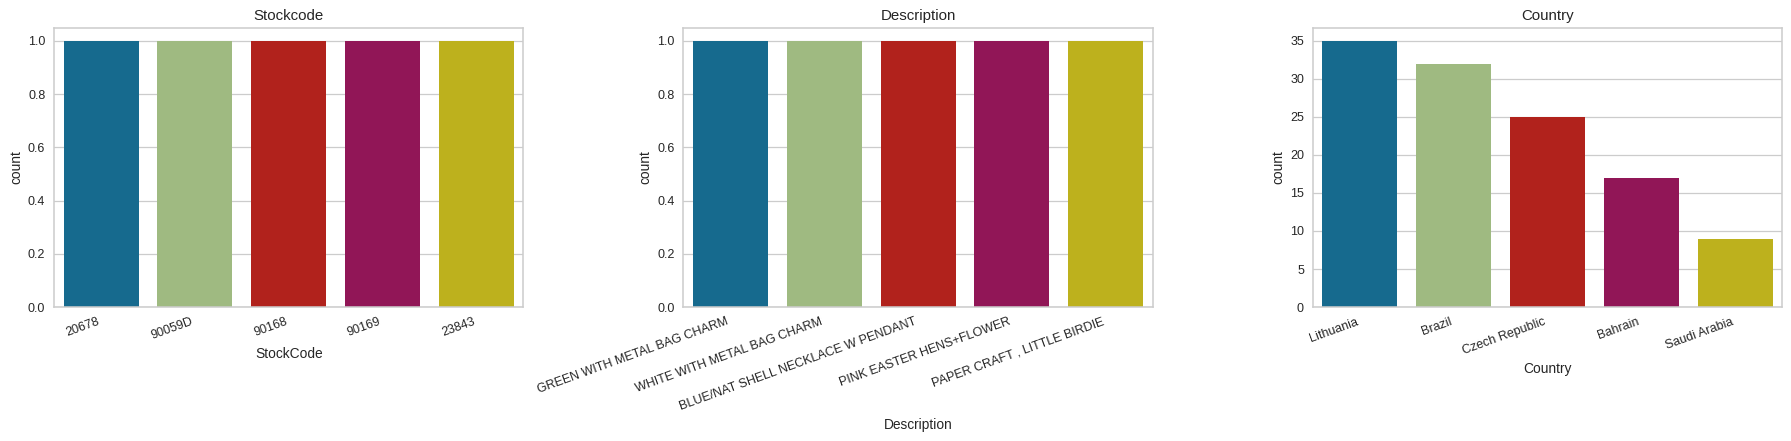

In [ ]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

Observations/Hypothesis:
1. Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers 
2. There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
3. Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
4. Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

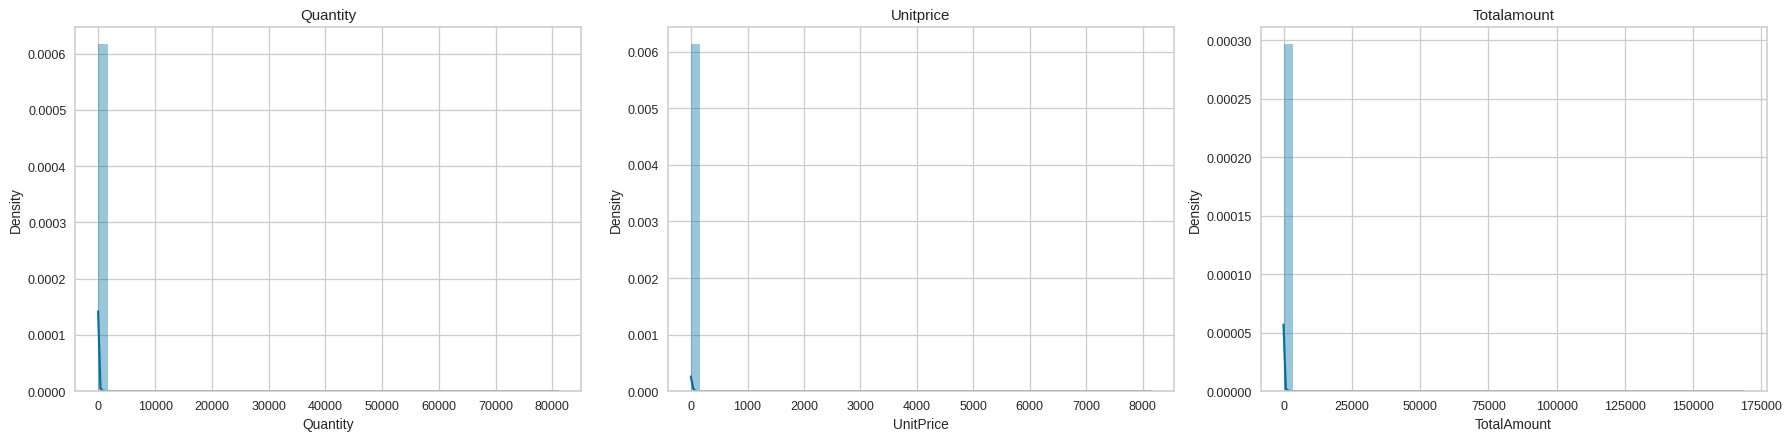

In [ ]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()

Observation:
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
2. For symmetric graph mean=median=mode.

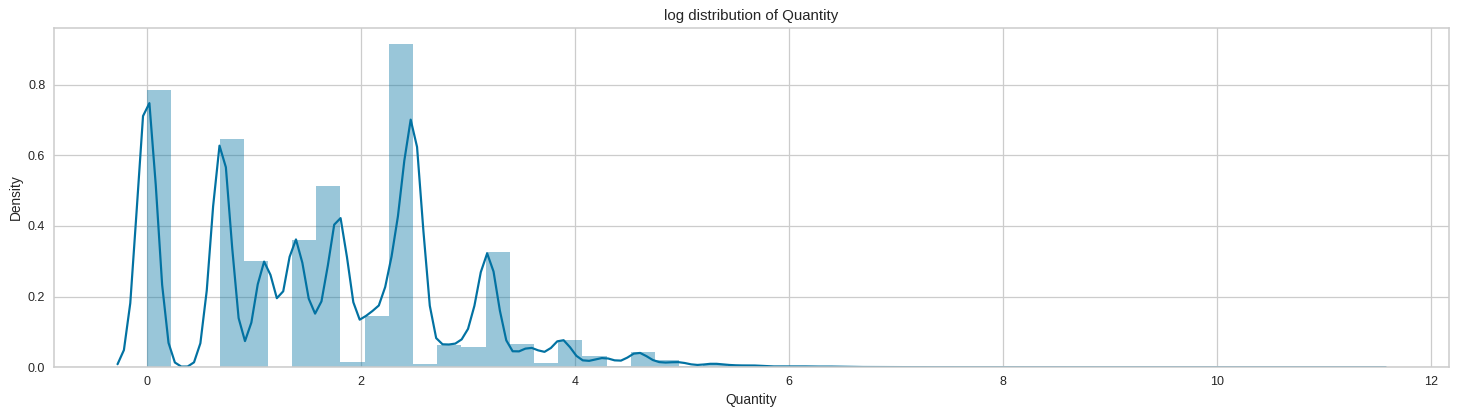

In [ ]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show()

In [ ]:
# Most orders placed are from these countries
country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

,Country,Invoice_Count
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98


* United Kingdom is making most of the purchases as compared to other countries

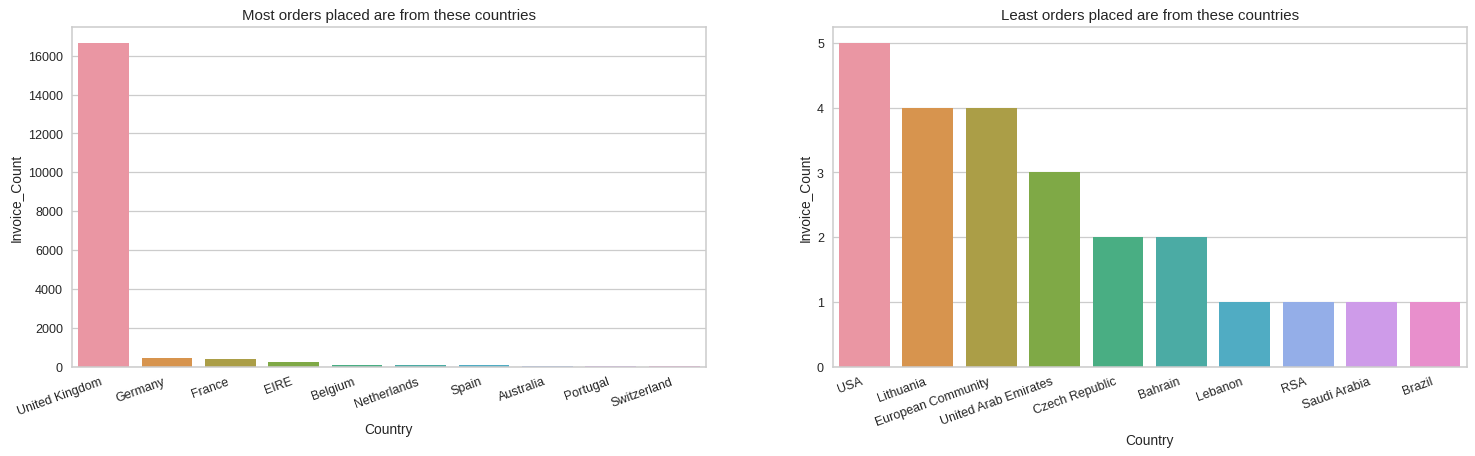

In [ ]:
# Visualizing top and bottom 10 countries based on total invoices 
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

In [ ]:
# Most customers are from these countries
country_cust = df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


* United Kingdom has most number of customers 



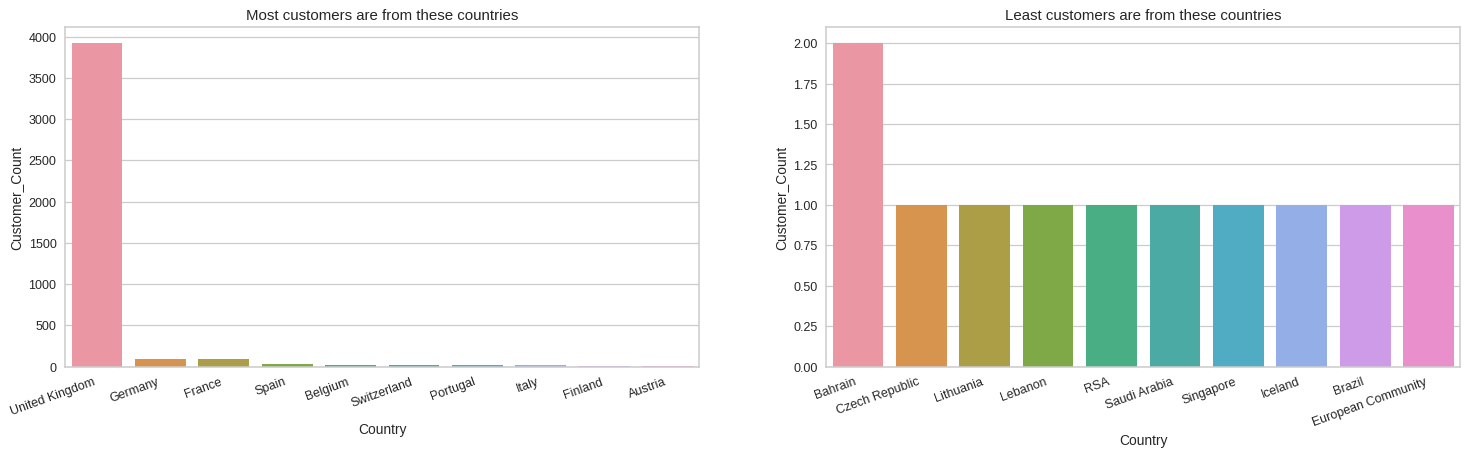

In [ ]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [ ]:
# Countrywise average item purchases
country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
23,Netherlands,85.034702
19,Japan,81.046729
31,Sweden,80.173333
0,Australia,71.114020
8,Czech Republic,26.840000


* Orders with mass quantity are placed by the customers from Netherlands



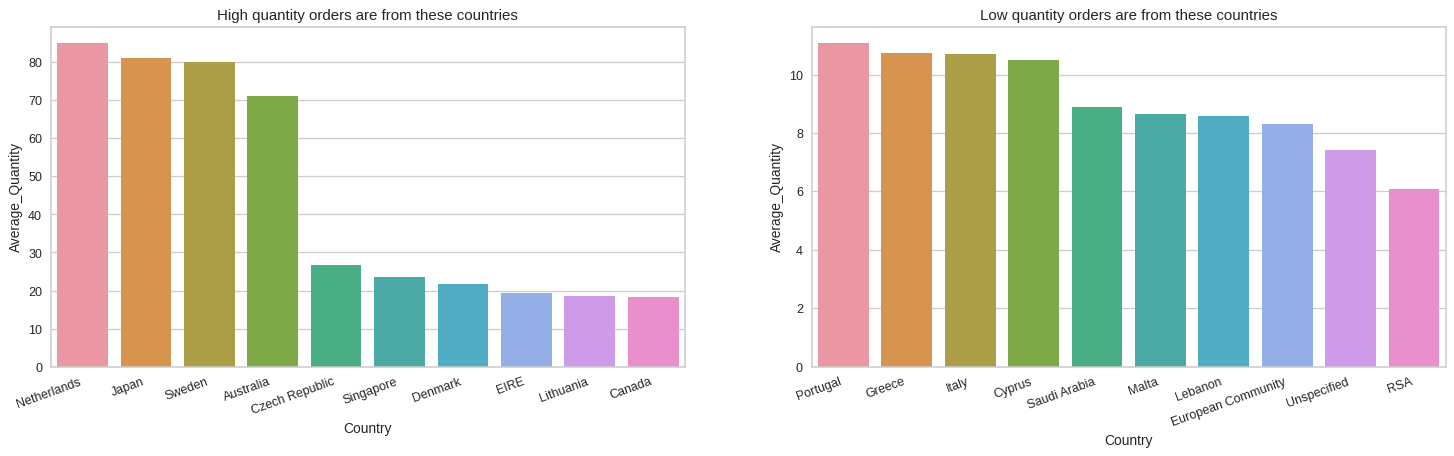

In [ ]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [ ]:
# quantity wise item purchases
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


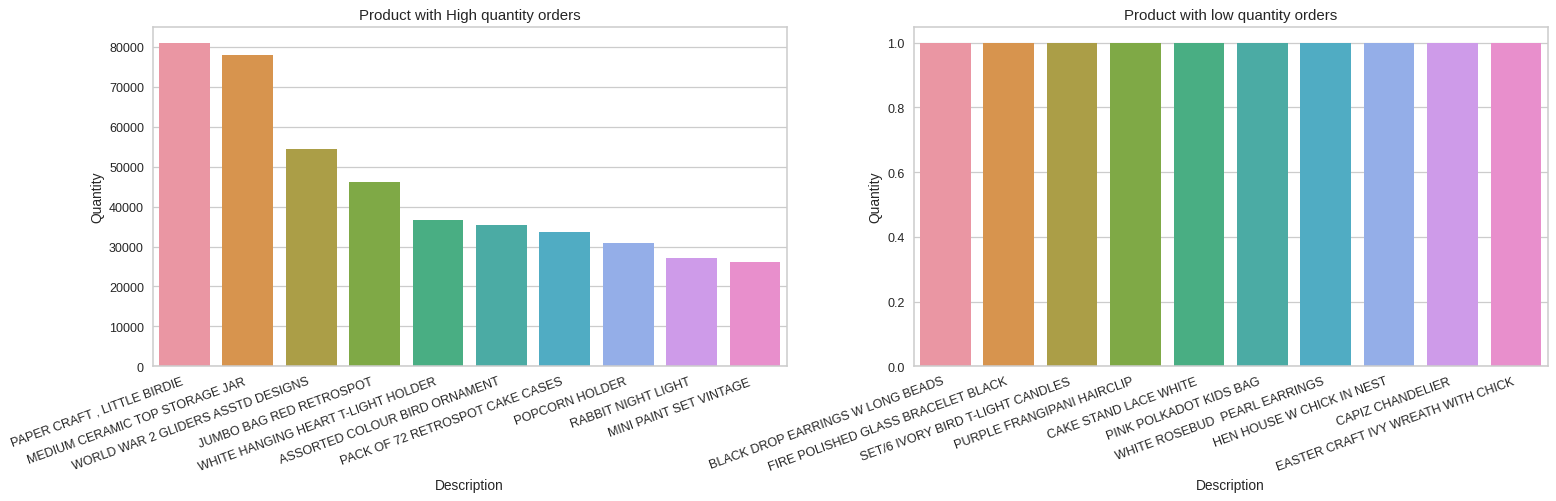

In [ ]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [ ]:
# Amount wise item purchases
product_price = df.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

,Description,TotalAmount
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142264.75
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


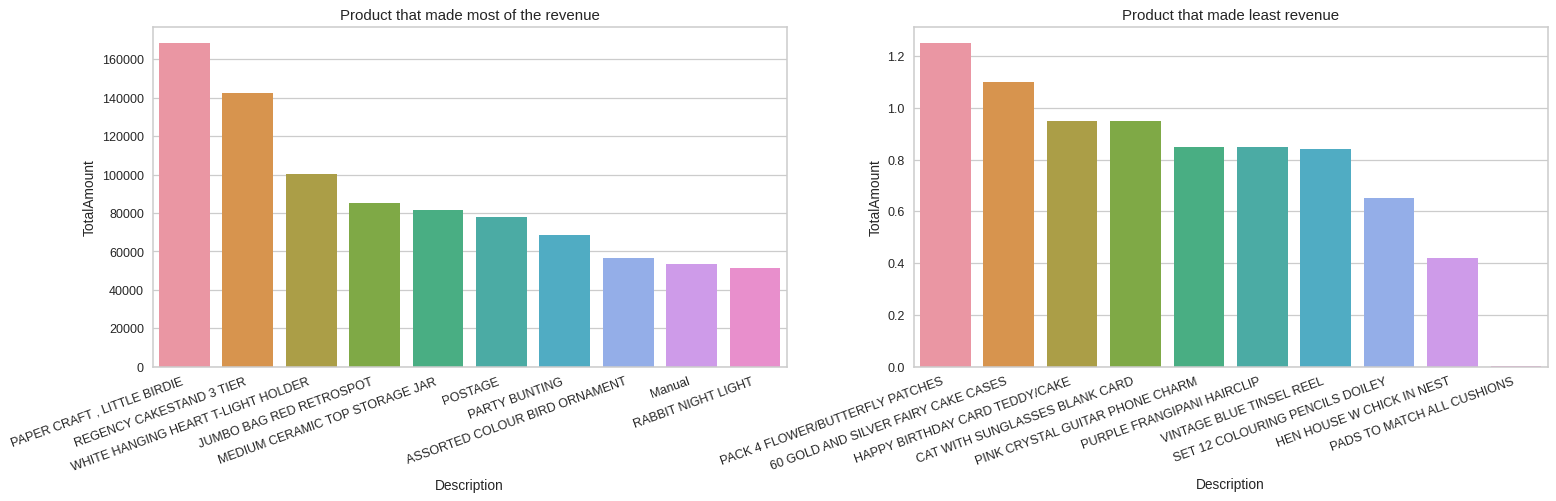

In [ ]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [ ]:
# customer wise item purchases
product_customer = df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

,Description,Customer_Count
2767,REGENCY CAKESTAND 3 TIER,881
3698,WHITE HANGING HEART T-LIGHT HOLDER,856
2345,PARTY BUNTING,708
216,ASSORTED COLOUR BIRD ORNAMENT,678
3001,SET OF 3 CAKE TINS PANTRY DESIGN,640


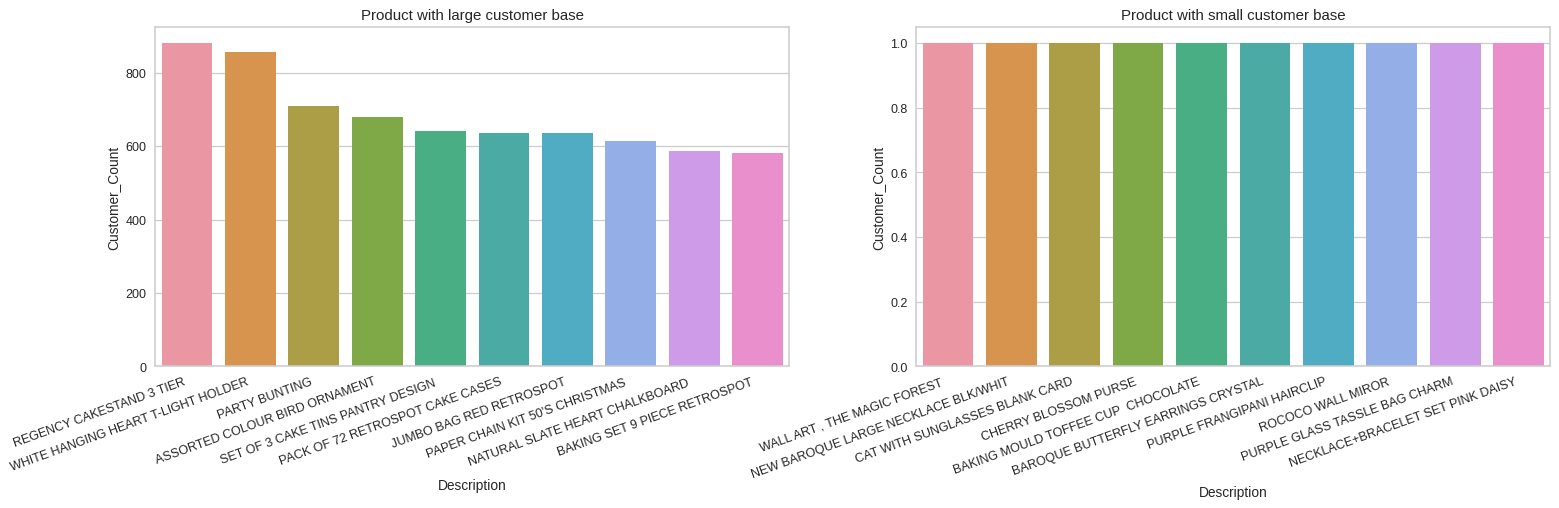

In [ ]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [ ]:
# Checking the number of cancellations by each customer. 
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

,CustomerID,Cancellations
736,14911.0,226
1485,17841.0,136
1397,17511.0,113
848,15311.0,112
89,12607.0,101


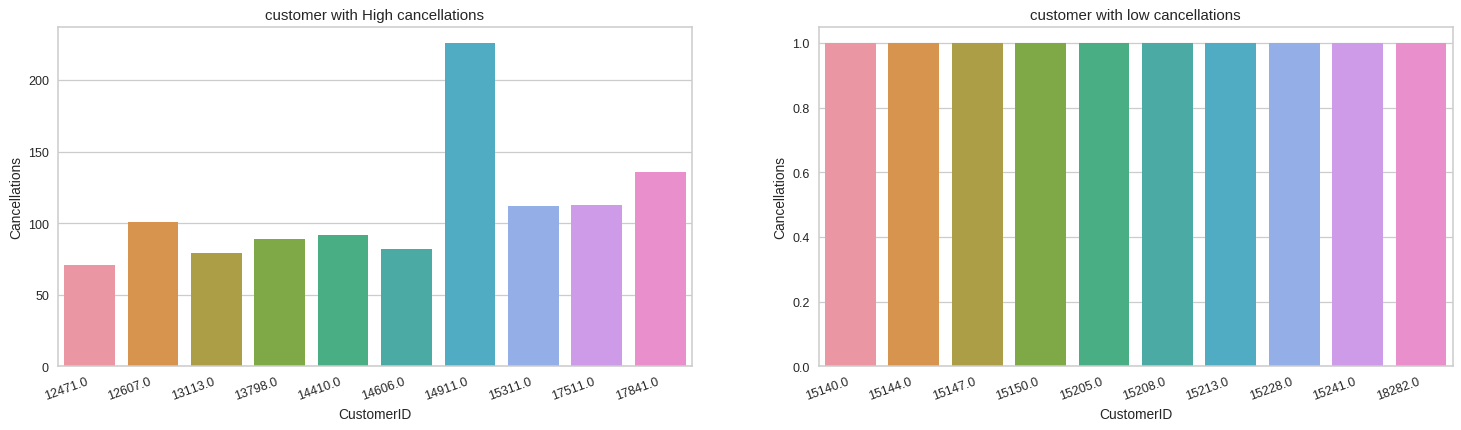

In [ ]:
# Visualizing top and bottom 10 customers based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(10),x="CustomerID",y="Cancellations")
plt.show()

In [ ]:
# Checking the number of cancellations countrywise. 
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

,Country,Cancellations
27,United Kingdom,7501
11,Germany,453
7,EIRE,247
10,France,148
26,USA,112


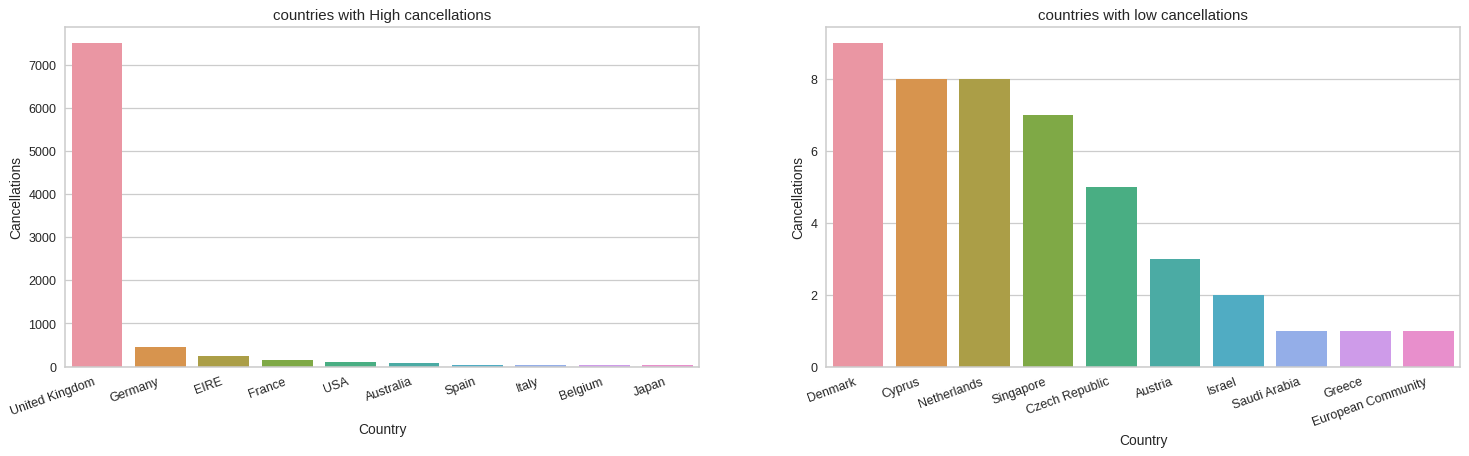

In [ ]:
# Visualizing top and bottom 10 countries based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(10),x="Country",y="Cancellations")
plt.show()

## **RFM Modelling**

1. Since Most of the Customers are wholesalers we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.
2. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers
WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT
They sell it to individual customers(B2C) or sell all products to another stores (B2B)
3. Due to all these reasons we need to cluster customers according to there activities i.e
  1. R- Recency
  2. F- Frequency
  3. M- Monetary

In [ ]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


Interpretation:
1. Recency: How recent a customer made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary: How much money a customer spends.

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

Interpretation:
1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,3,3,4,334,10,2.944439,4.290459,7.471676
12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338


In [ ]:
# Checking Descriptive Stats
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.216154,2.514174,2.487670,2.499885,278.793962,7.501729,3.767274,3.670868,6.584187
std,100.009747,225.515328,8984.248299,1.126392,1.122724,1.118266,118.825268,2.816451,1.432382,1.321685,1.265573
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,0.000000
25%,18.000000,17.000000,306.455000,2.000000,1.000000,1.500000,211.000000,5.000000,2.890372,2.833213,5.725071
50%,51.000000,41.000000,668.560000,3.000000,2.000000,2.000000,311.000000,7.000000,3.931826,3.713572,6.505126
75%,142.000000,98.000000,1660.315000,4.000000,3.000000,3.500000,411.000000,10.000000,4.955827,4.584967,7.414763
max,374.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000,5.924256,8.945854,12.543280


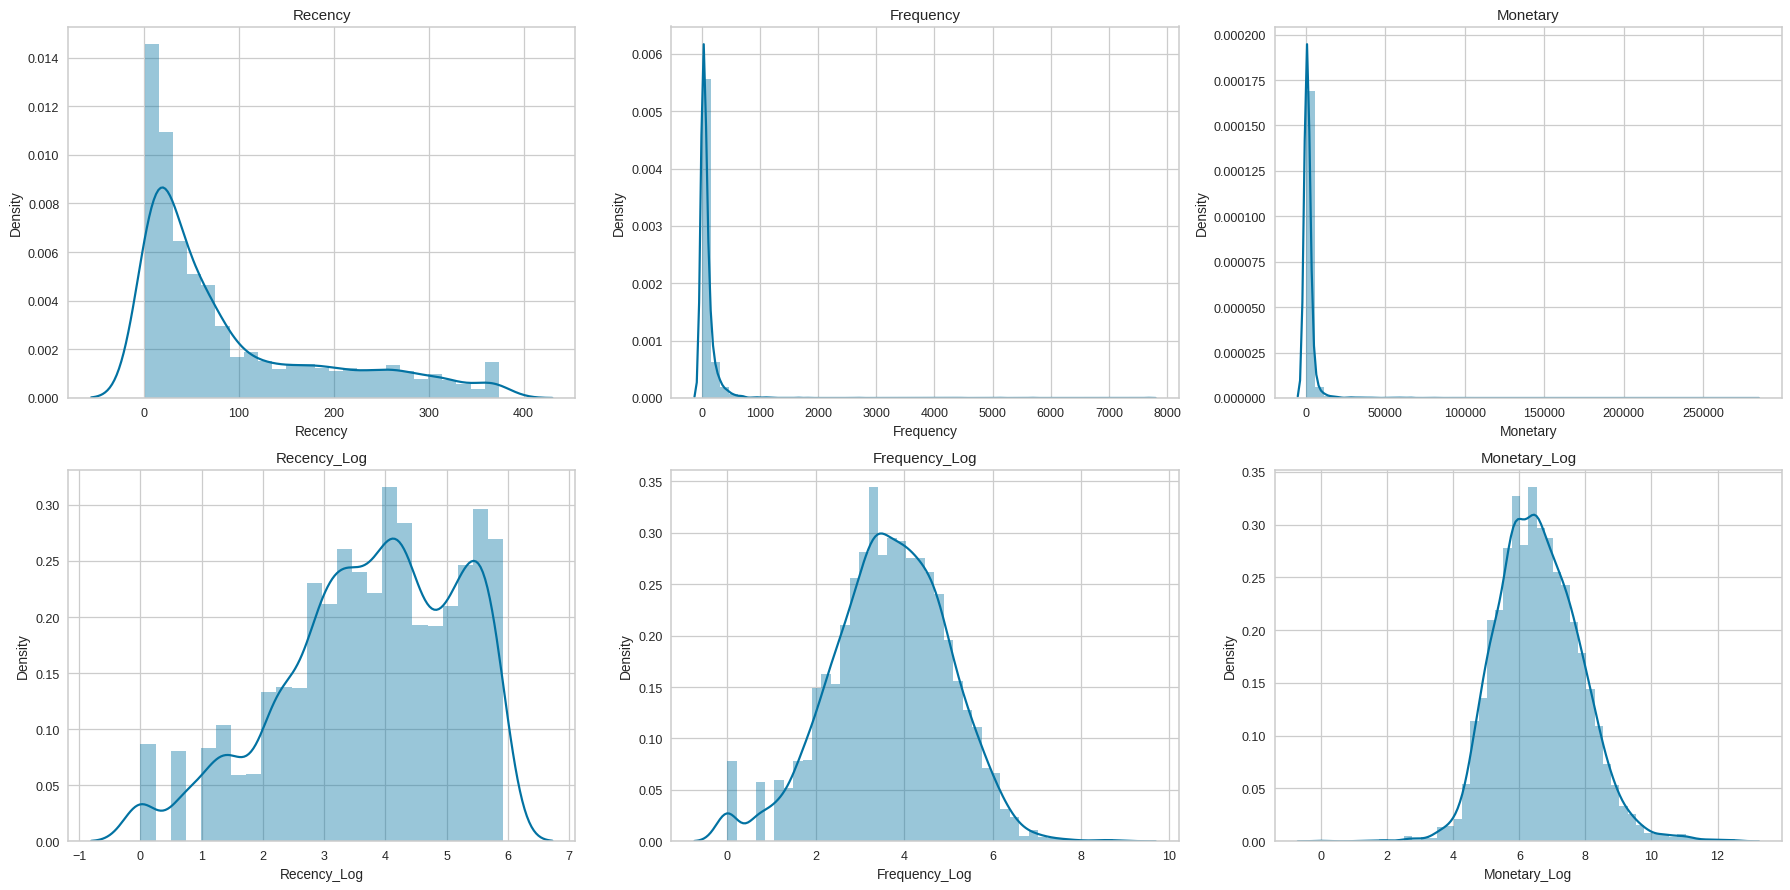

In [ ]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

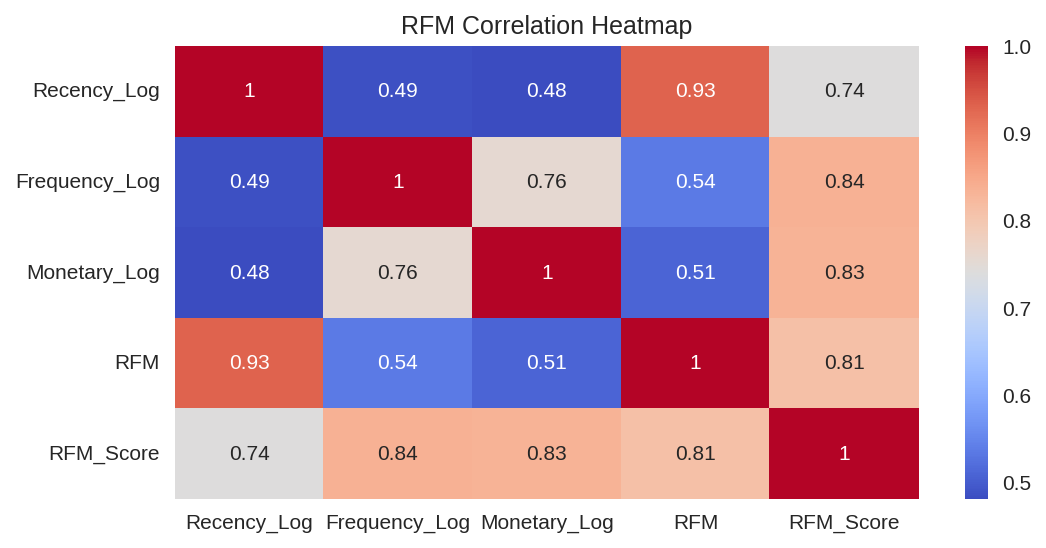

In [ ]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4), dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

#**Clustering**

##**Prerequisites**

In [ ]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [ ]:
# Initializing an empty dictionary to store the stats and summary for all clusters 
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})
  
  # Changing the name for the columns 
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm,segment_name) 

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap="plasma"))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap="plasma"))

  return stats, summary

##**Binning RFM_Score**

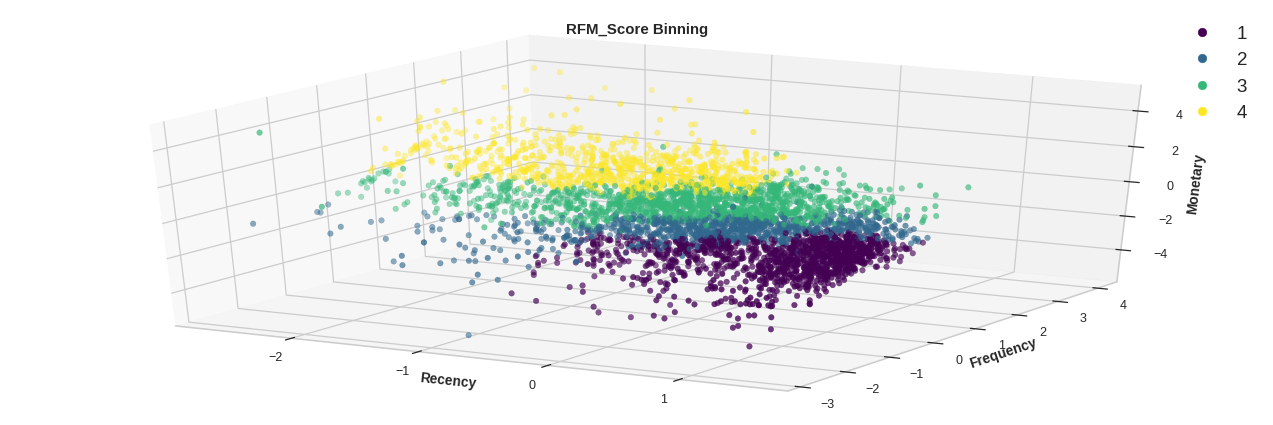

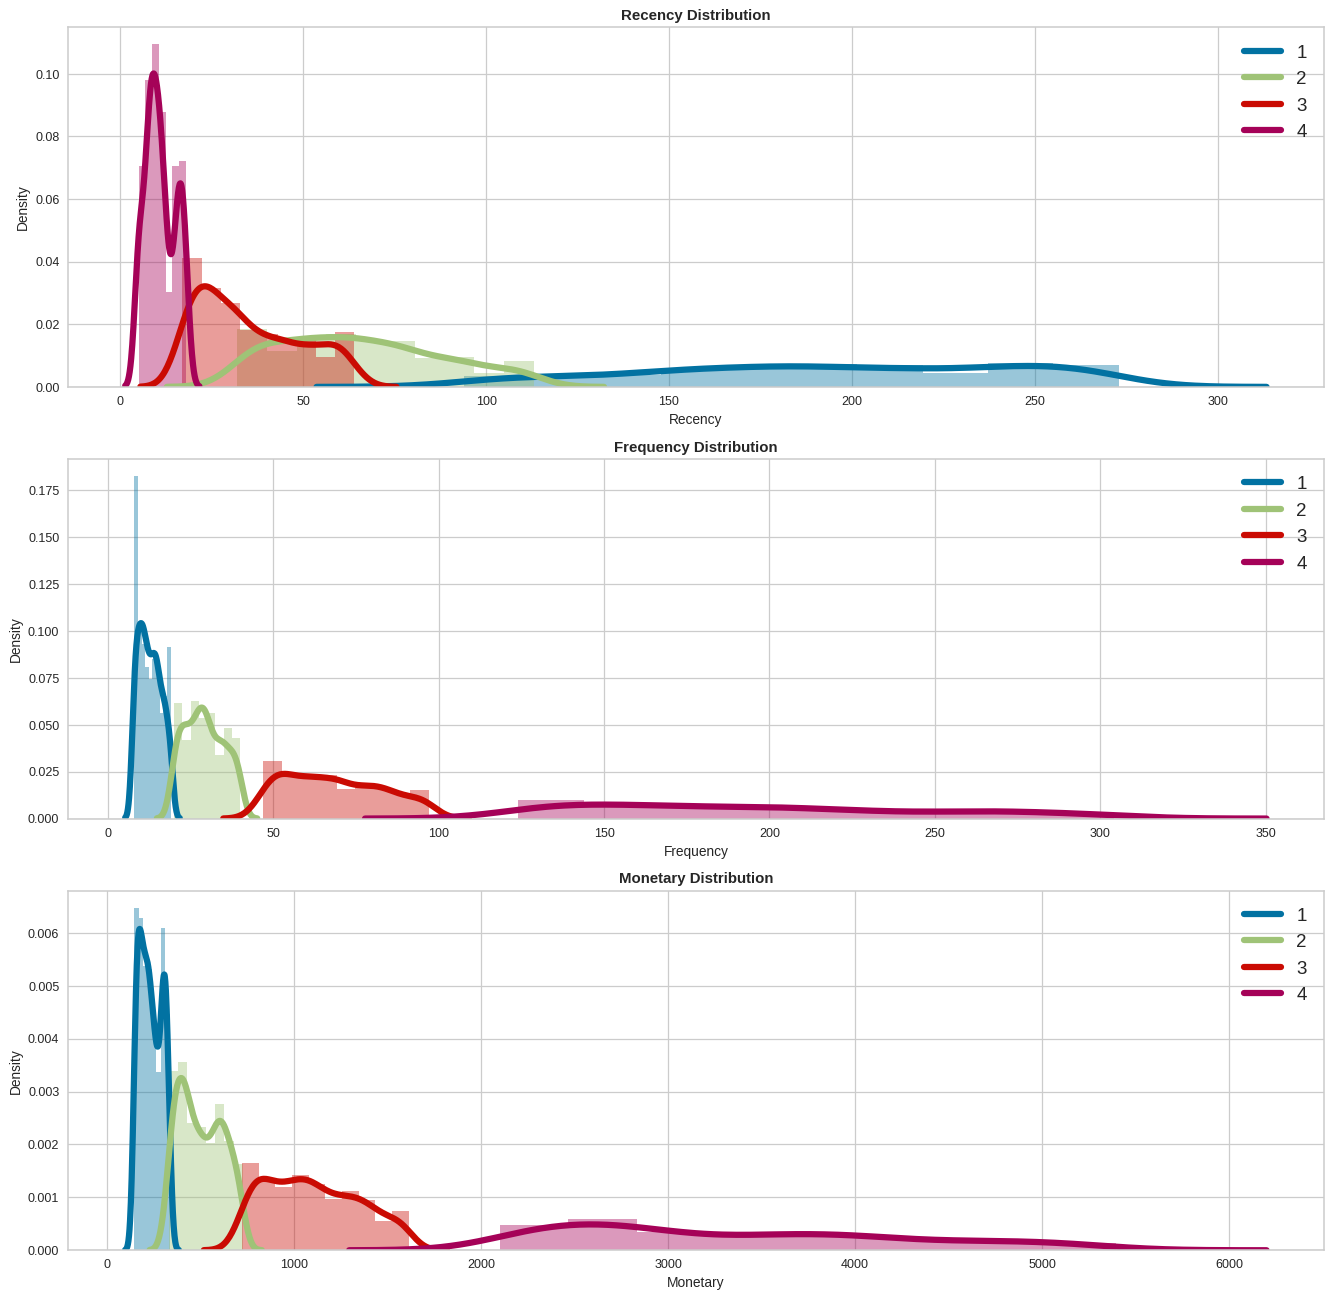



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



Binning,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,192.165501,196.000000,15.062160,12.000000,266.505704,225.900000,1287
2,87.606949,64.000000,32.930510,29.000000,788.401130,488.200000,921
3,47.848532,31.000000,81.241886,67.000000,1597.725141,1076.100000,1294
4,13.761051,10.000000,284.218638,190.000000,6870.541553,3158.130000,837


Binning,Last_visited,Purchase_frequency,Money_spent
1,93 to 274 days ago,Bought 7 to 20 times,Spent around 142 to 335 Sterling
2,31 to 114 days ago,Bought 19 to 41 times,Spent around 327 to 725 Sterling
3,16 to 65 days ago,Bought 46 to 98 times,Spent around 717 to 1613 Sterling
4,4 to 19 days ago,Bought 123 to 305 times,Spent around 2093 to 5398 Sterling


In [ ]:
# Splitting RFM_Score in 4 bins based on quantiles
y = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

##**Quantile Based Clustering**

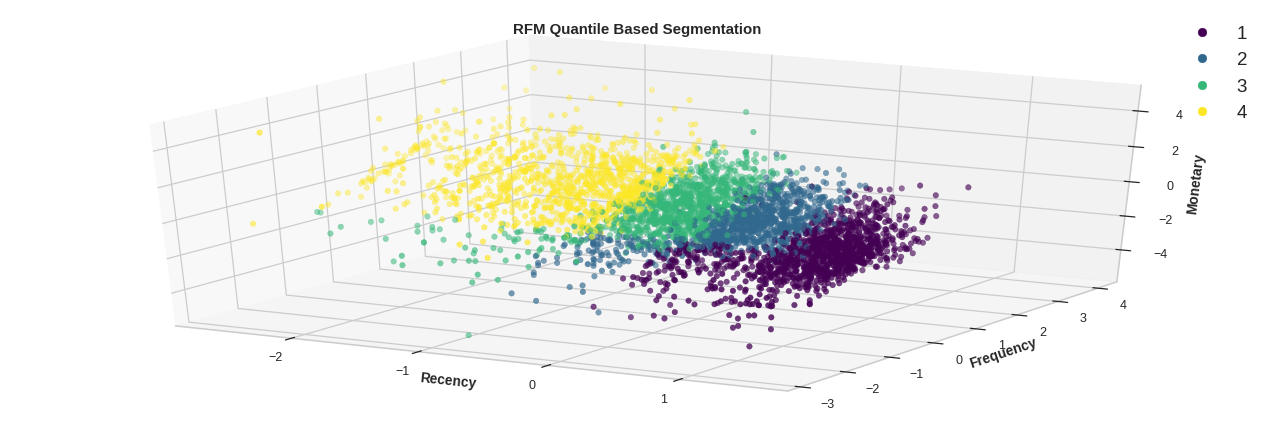

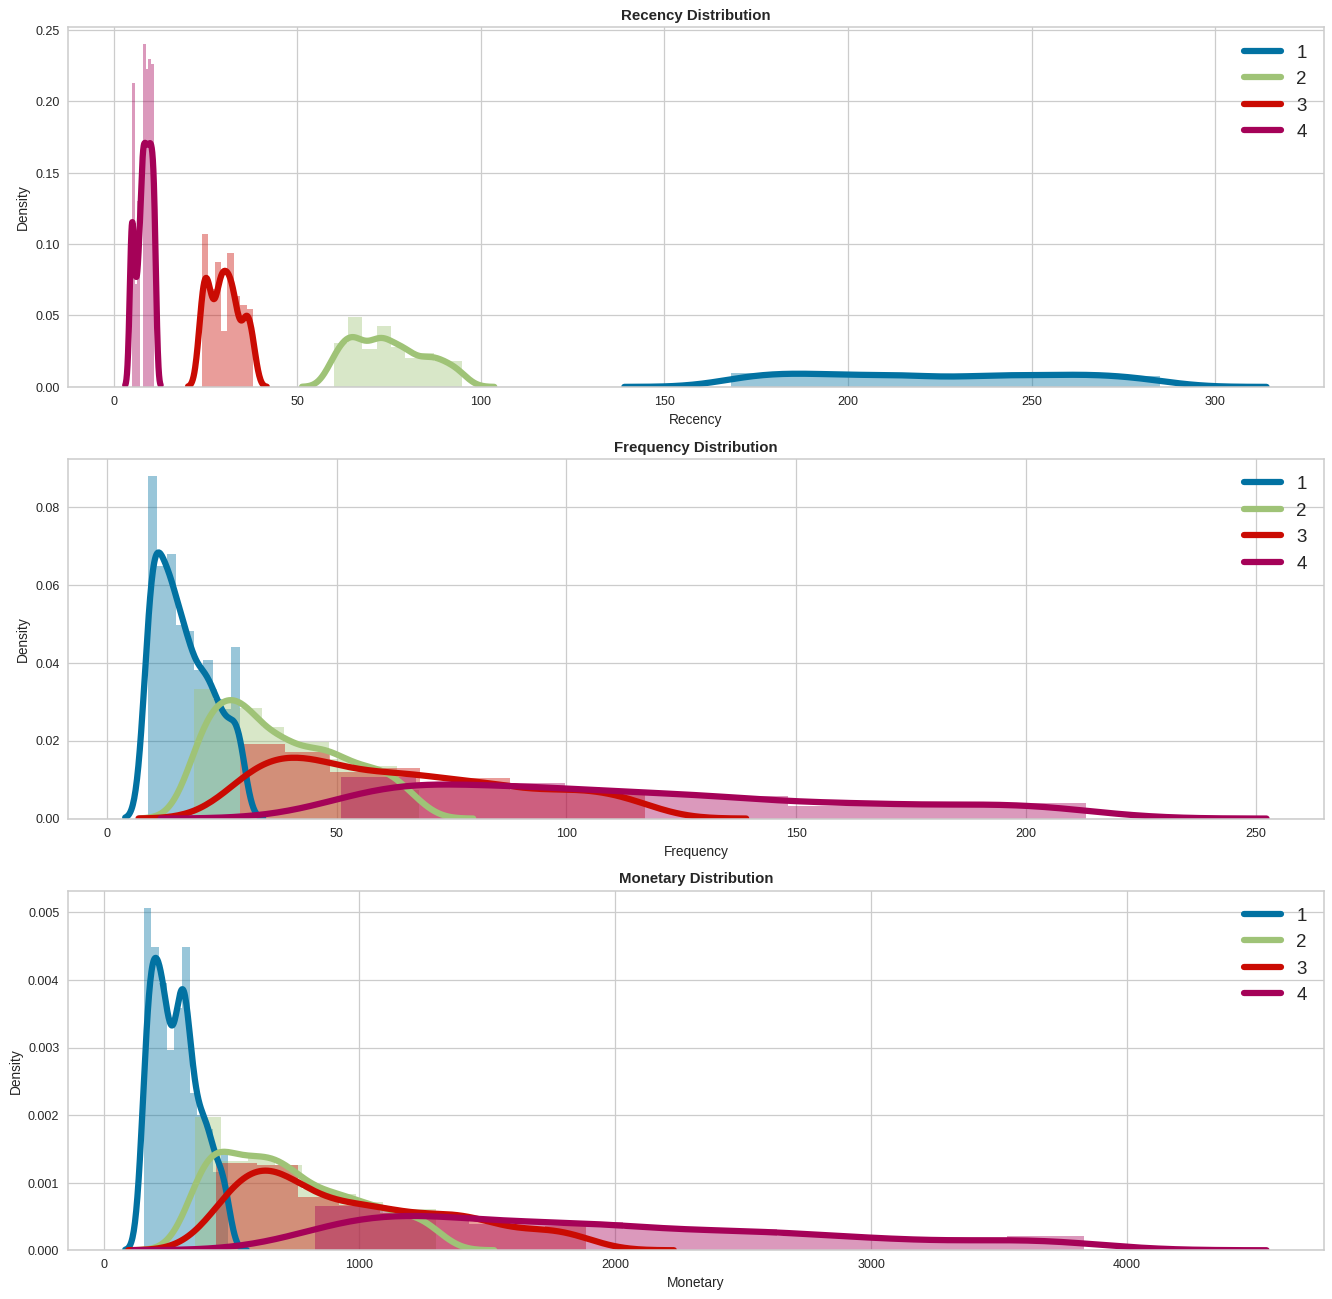



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



QuantileCut,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
1,224.110055,220.000000,26.190024,15.000000,582.373025,280.550000,1263
2,77.805941,73.000000,54.198020,36.000000,1078.258853,675.645000,1010
3,30.647175,30.000000,94.935580,61.000000,1831.494709,881.290000,1009
4,8.400189,8.000000,197.846736,106.000000,4933.446698,1814.120000,1057


QuantileCut,Last_visited,Purchase_frequency,Money_spent
1,166 to 286 days ago,Bought 8 to 30 times,Spent around 156 to 486 Sterling
2,59 to 96 days ago,Bought 18 to 69 times,Spent around 355 to 1301 Sterling
3,23 to 39 days ago,Bought 28 to 118 times,Spent around 439 to 1887 Sterling
4,4 to 12 days ago,Bought 50 to 214 times,Spent around 822 to 3849 Sterling


In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

##**K-Means Clustering**

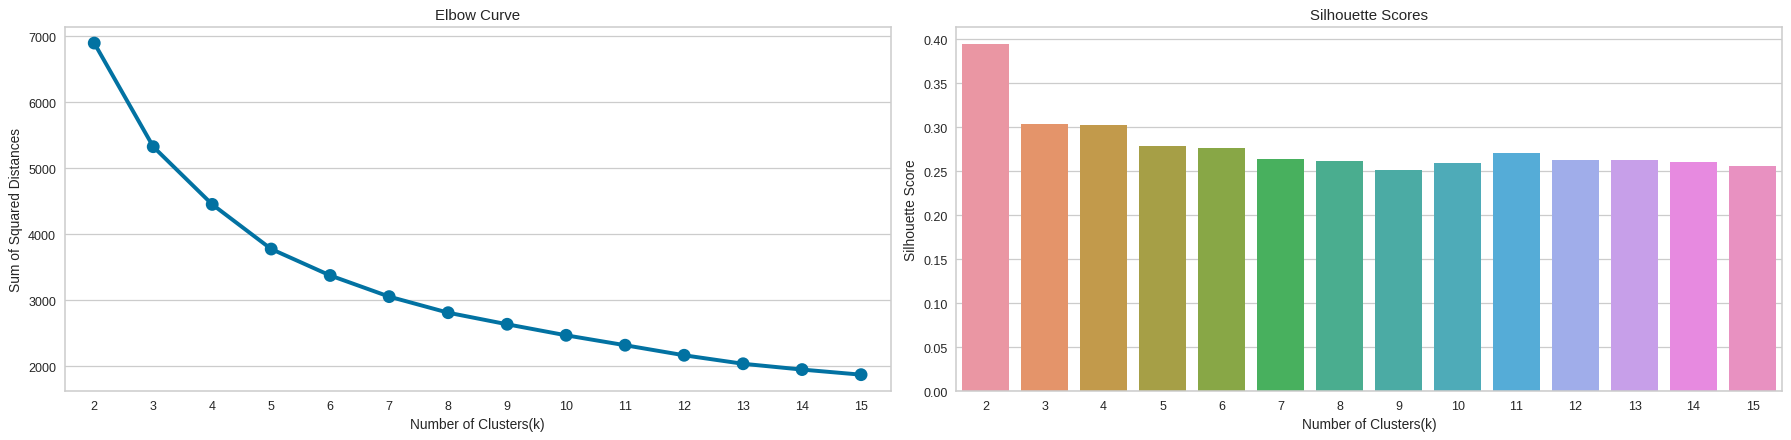

In [ ]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

Observations:
1. From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.
2. If we go by maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be chosen.
3. If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

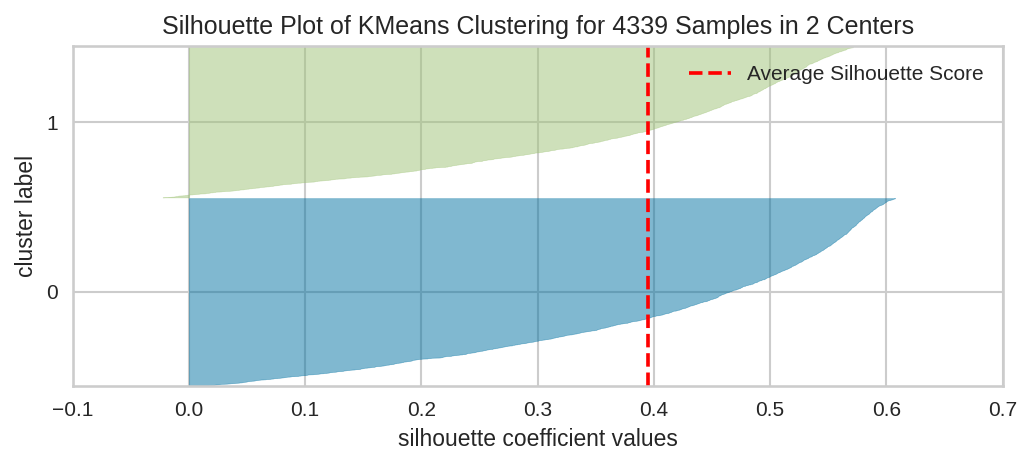

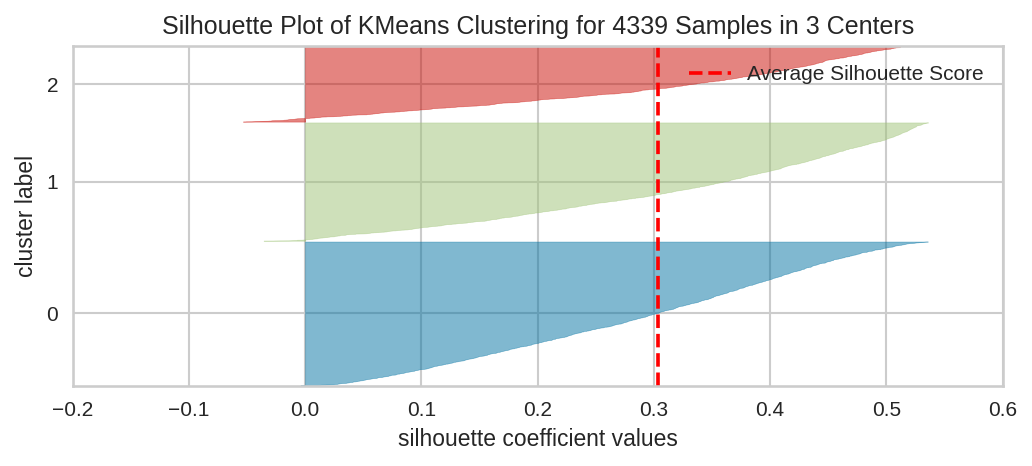

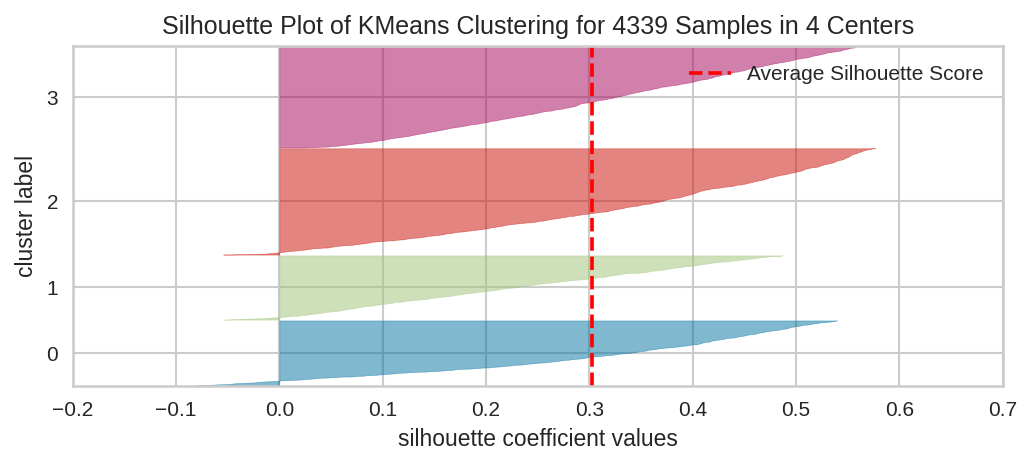

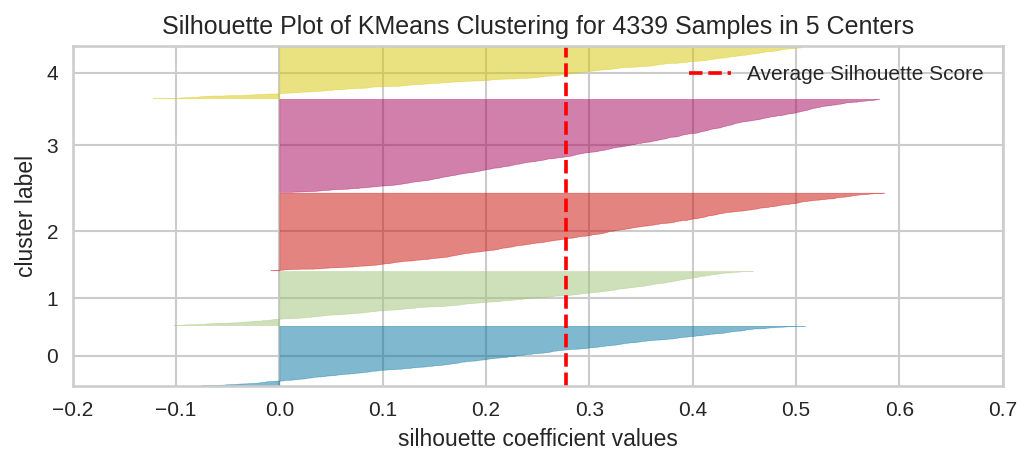

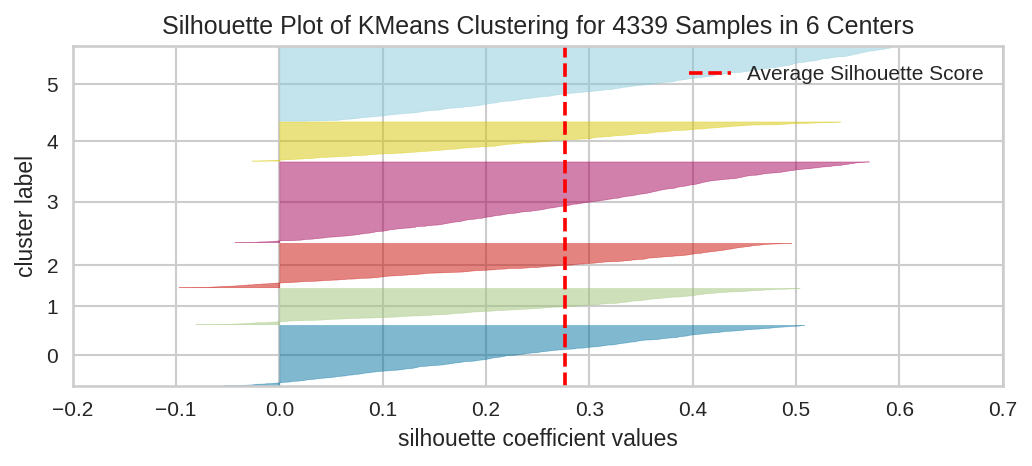

In [ ]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

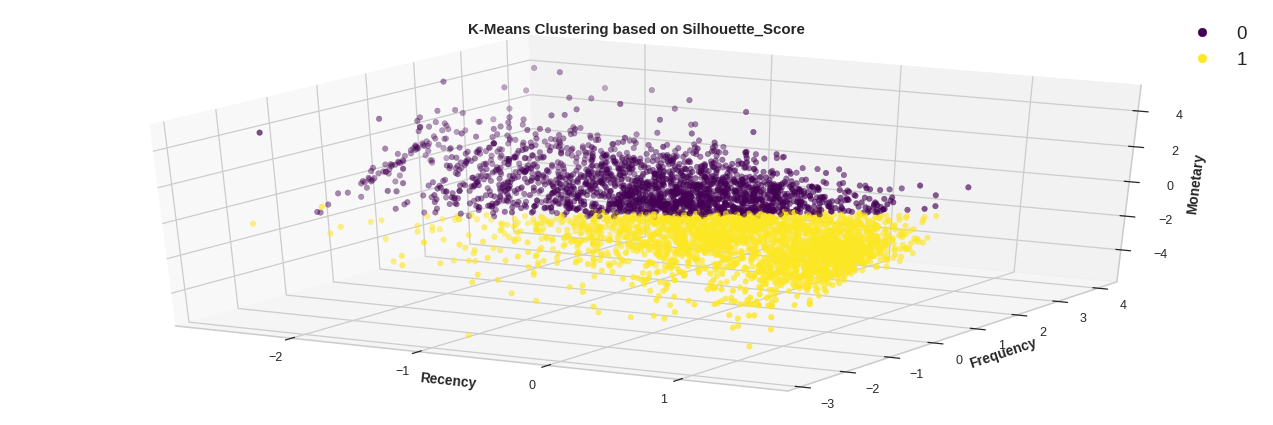

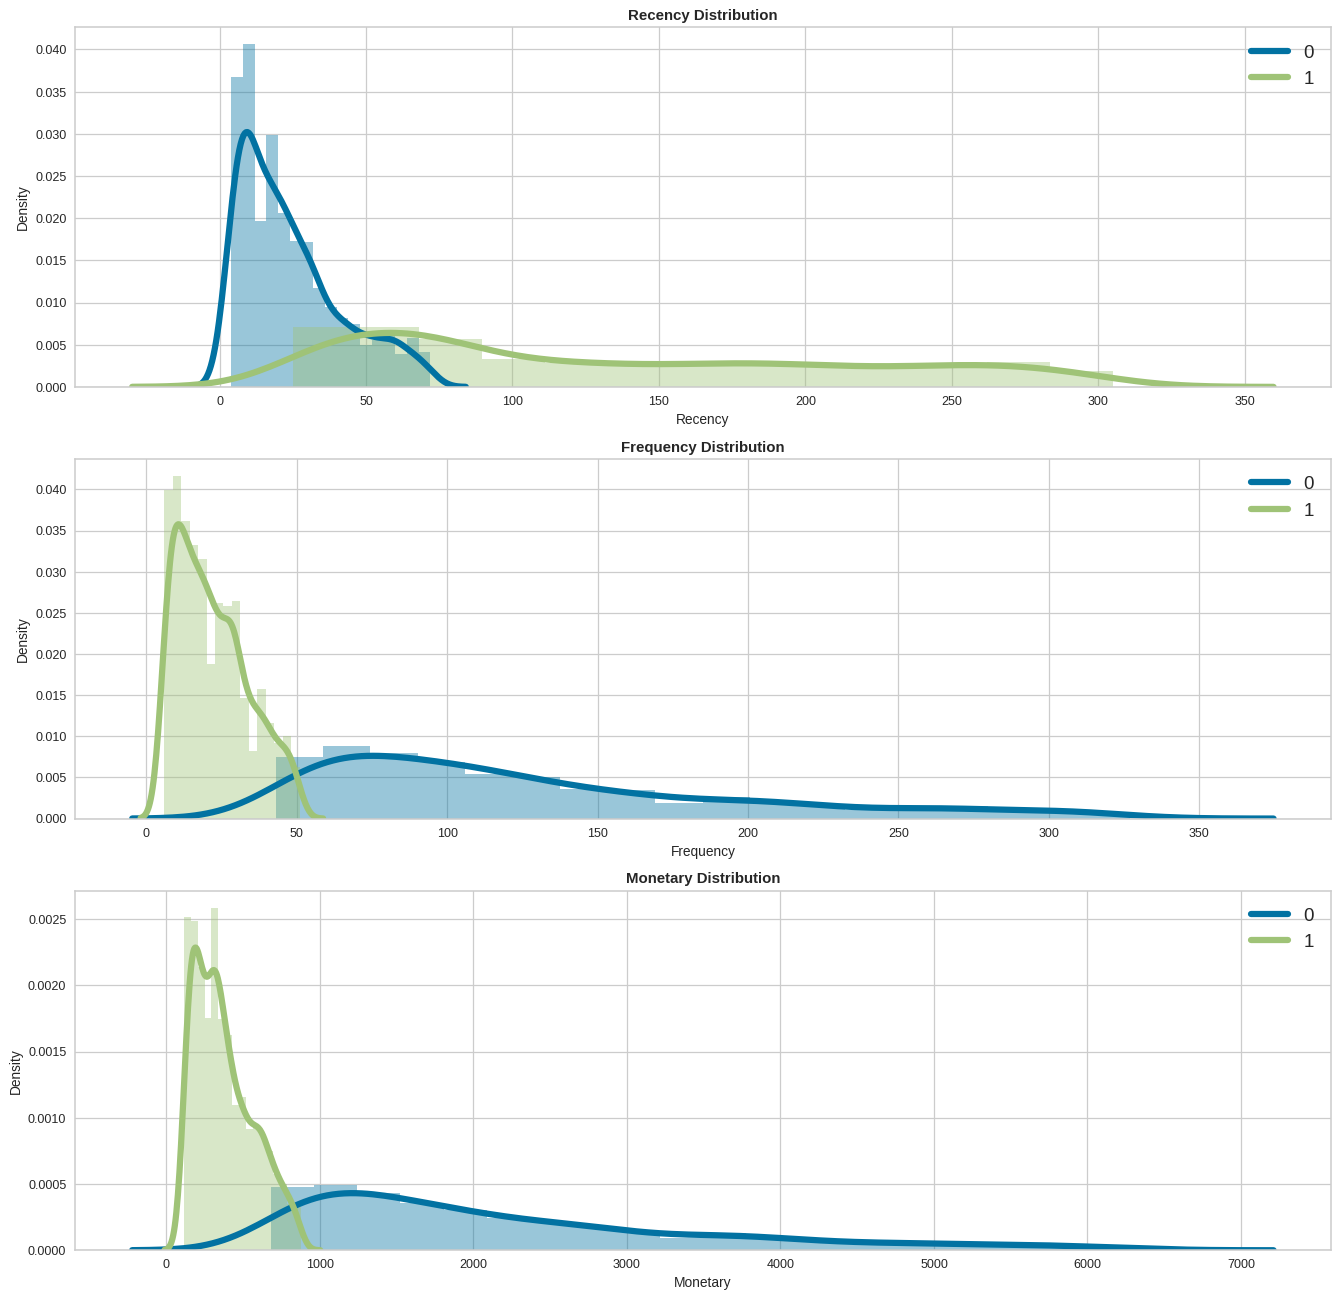



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|2Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,31.074883,18.000000,173.084763,108.000000,4029.985352,1823.520000,1923
1,141.423841,109.000000,24.788907,20.000000,470.839430,331.210000,2416


K-Means|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,8 to 38 days ago,Bought 67 to 192 times,Spent around 1068 to 3350 Sterling
1,51 to 227 days ago,Bought 10 to 33 times,Spent around 189 to 571 Sterling


In [ ]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

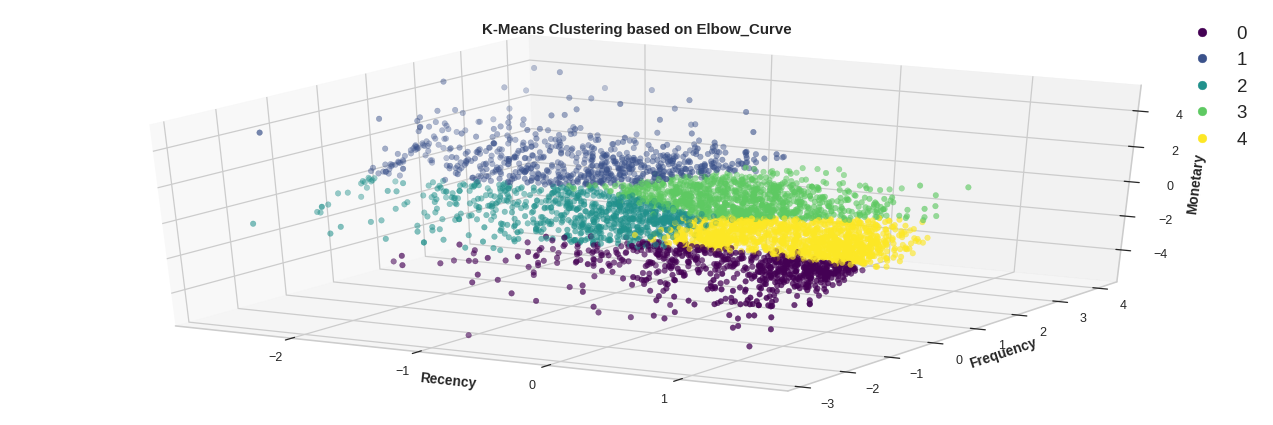

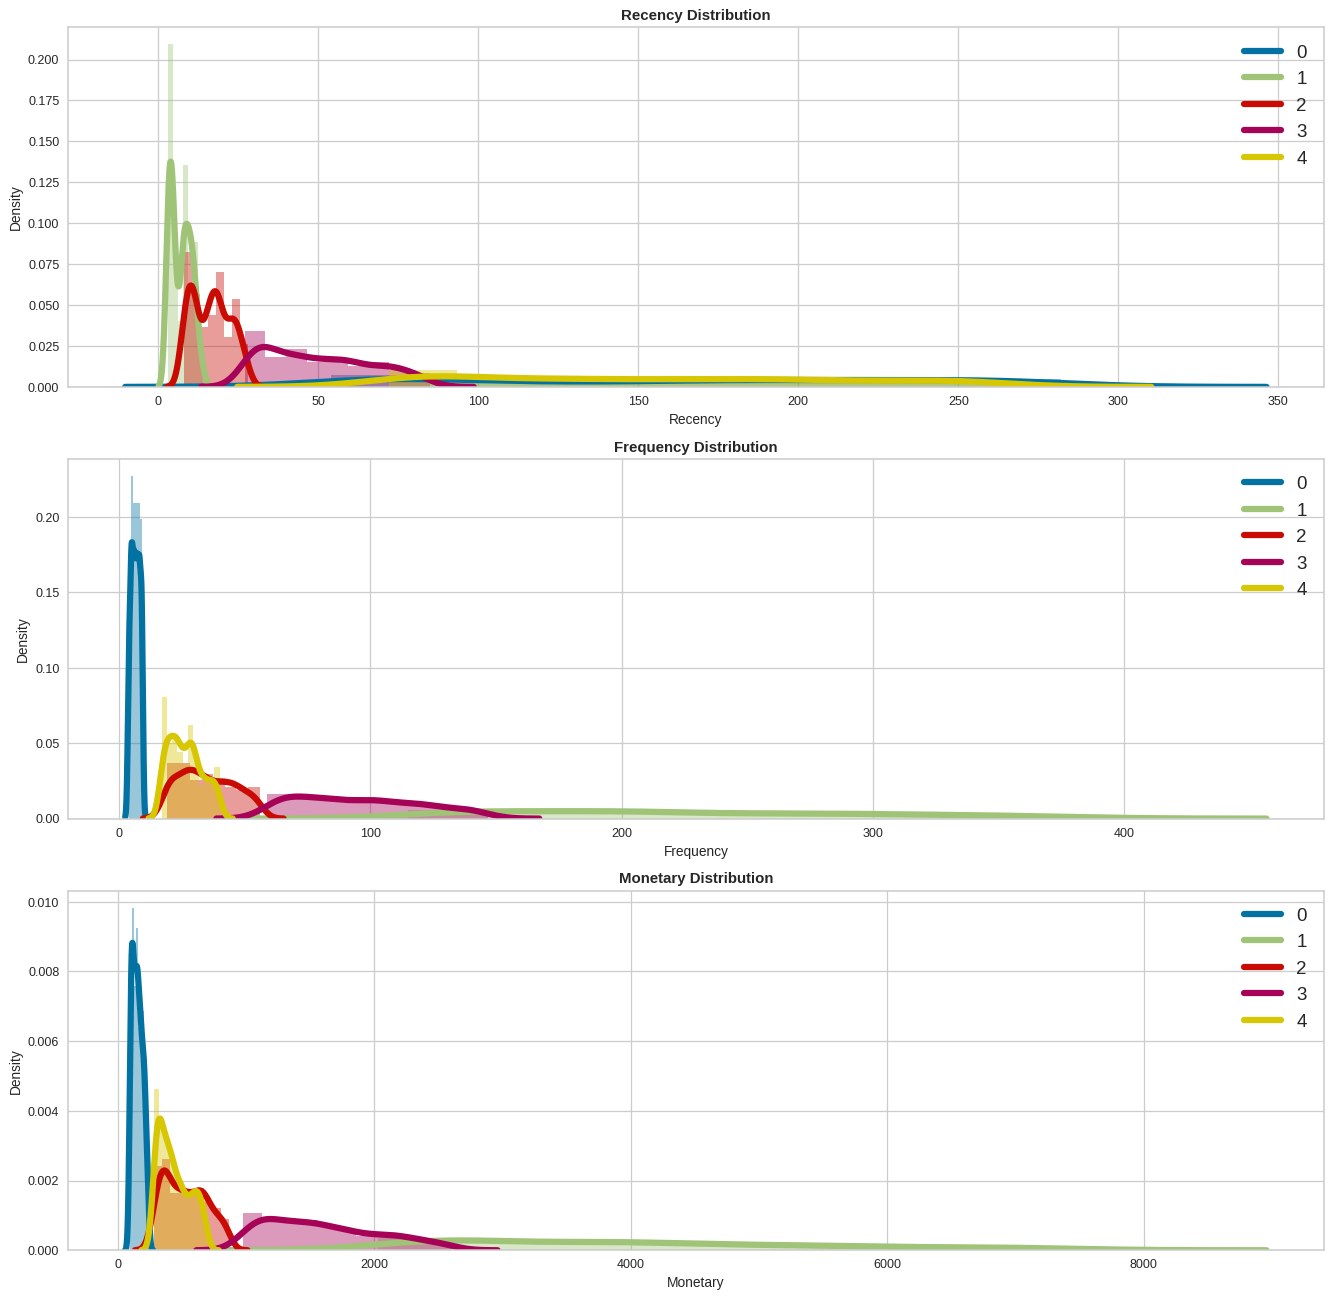



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|5Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,170.579330,170.000000,6.950509,7.000000,198.009854,152.550000,687
1,9.066265,7.000000,314.746988,212.000000,8374.983886,3803.320000,664
2,17.418848,17.000000,40.079843,34.000000,623.428522,512.180000,764
3,62.401942,46.000000,108.941748,94.000000,2040.923865,1531.530000,1030
4,168.046064,152.000000,30.262982,26.000000,512.342422,414.570000,1194


K-Means|5Cluster,Last_visited,Purchase_frequency,Money_spent
0,64 to 265 days ago,Bought 4 to 10 times,Spent around 103 to 215 Sterling
1,3 to 12 days ago,Bought 128 to 340 times,Spent around 2289 to 6480 Sterling
2,8 to 25 days ago,Bought 20 to 52 times,Spent around 316 to 780 Sterling
3,29 to 75 days ago,Bought 63 to 135 times,Spent around 1058 to 2297 Sterling
4,78 to 246 days ago,Bought 18 to 37 times,Spent around 302 to 632 Sterling


In [ ]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")           # Setting 5 Clusters
y = kmc.fit_predict(X)                                # Fitting the model
centers = kmc.cluster_centers_                        # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'     # Setting the title
segment_name = 'K-Means|5Cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

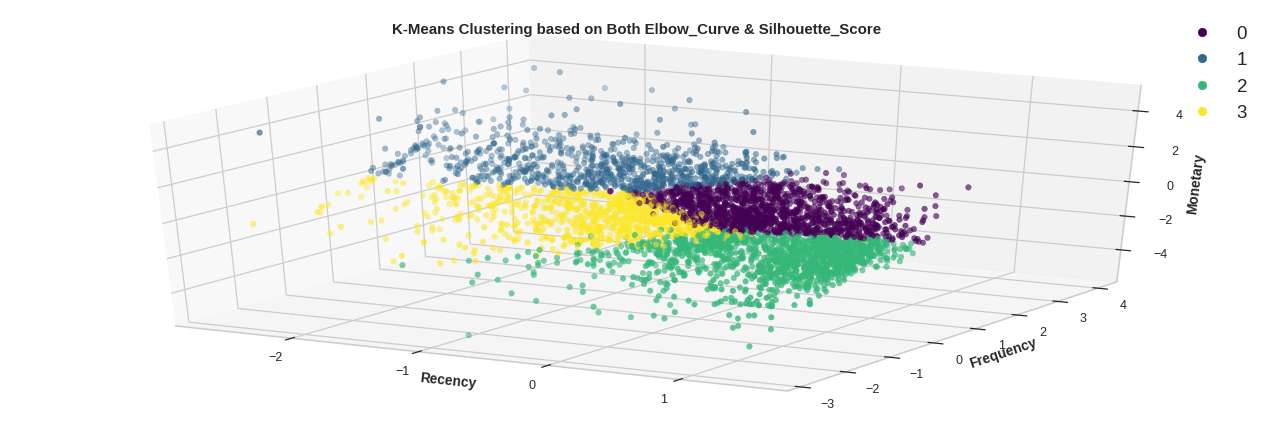

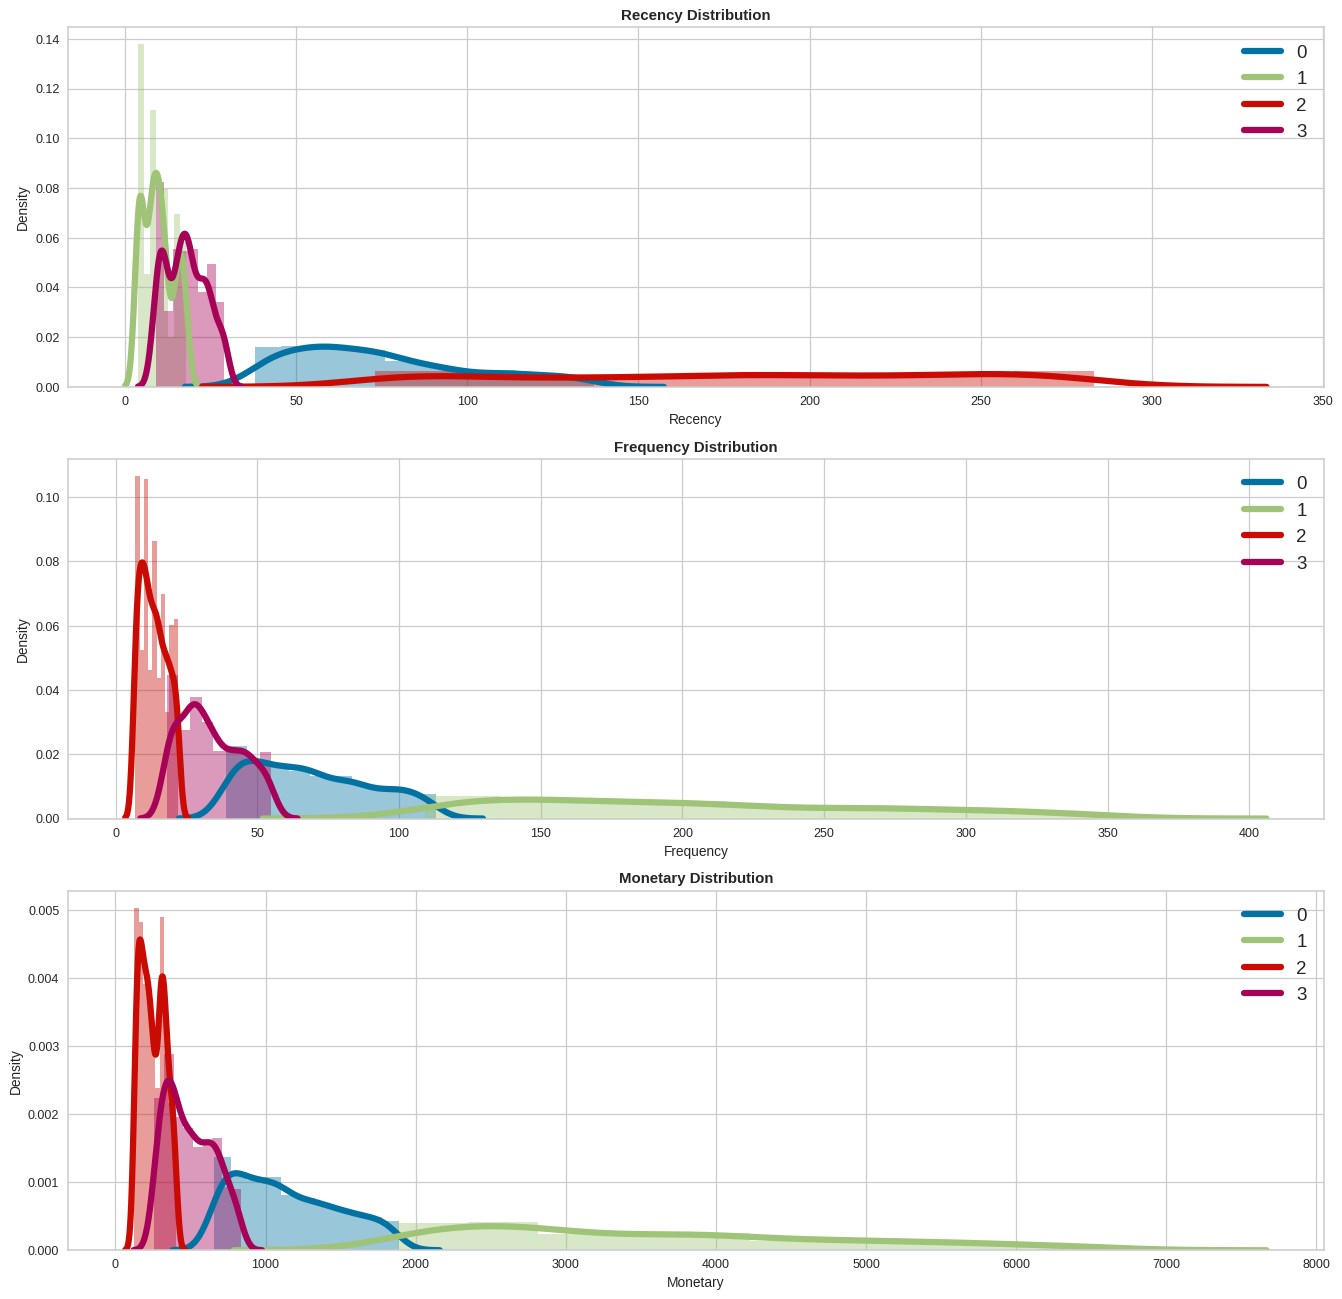



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



K-Means|4Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Count_
0,93.587007,71.000000,80.149265,66.000000,1518.949902,1086.920000,1293
1,12.146108,9.000000,283.461078,193.000000,7212.437509,3347.310000,835
2,184.356313,184.000000,14.753991,12.500000,295.824551,240.275000,1378
3,19.500600,17.000000,38.509004,32.000000,592.048163,471.400000,833


K-Means|4Cluster,Last_visited,Purchase_frequency,Money_spent
0,43 to 120 days ago,Bought 42 to 103 times,Spent around 709 to 1706 Sterling
1,4 to 17 days ago,Bought 120 to 309 times,Spent around 2071 to 5609 Sterling
2,81 to 268 days ago,Bought 7 to 21 times,Spent around 144 to 368 Sterling
3,9 to 28 days ago,Bought 20 to 52 times,Spent around 293 to 744 Sterling


In [ ]:
# Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")         # Setting 4 Clusters
y = kmc.fit_predict(X)                              # Fitting the model
centers = kmc.cluster_centers_                      # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'         # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

#**Conclusion**

1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.
3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the  algorithms and the statistics extracted from the data.
4. Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.


In [ ]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Binning','Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'RFM Quantile Cut', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', 'eps=0.2, min_samples=25'],
                        "Segments" : [4,4,5,2,4,2,3,4]},
                        index=['', '', '', '', '', '', '', ''])
summary.T

,,,,,,,,
Clusterer,Binning,Quantile Cut,K-Means,K-Means,K-Means,Agglomerative,Agglomerative,DBSCAN
Criterion,RFM Score Binning,RFM Quantile Cut,Elbow Curve,Silhouette Score,Elbow Curve & Silhouette Score,Dendogram (y=70),Dendogram (y=50),"eps=0.2, min_samples=25"
Segments,4,4,5,2,4,2,3,4


NOTE ALL THE VALUES SHOWN ARE APPROX!!

**VALUES MIN AND MAX ARE TAKEN FROM 25th PERCENTILE and 75th PERCENTILE OF FEATURES RESPECTIVELY** 






## **Helper Functions**

In [ ]:
# Defining a function to print the output in the form of MarkDown 
def printmd(string):
  '''
  col String : Type: String
  returns :MARKDOWN
  This functions allows us to print the output in the form of MarkDown 
  '''
  display(Markdown(string))
 
# Setting List of 5 types of customers based on activities of the customer
customers_type=["❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br>❌❌❌LOST POOR CUSTOMERS❌❌❌<br> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌",
                '🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br>🥉🥉🥉AVERAGE CUSTOMERS🥉🥉🥉<br>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉',
                '❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤<br>❤❤RECENTLY VISITED AVERAGE CUSTOMERS❤❤<br> ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤',
                ' 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br> 🥈🥈🥈GOOD CUSTOMERS🥈🥈🥈 <br> 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈',
                '💓💓💓💓💓💓💓💓💓💓💓💓 <br> 💓💓💓BEST CUSTOMERS💓💓💓 <br> 💓💓💓💓💓💓💓💓💓💓💓💓',
                "❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br>❌❌LOSING LOYAL CUSTOMERS❌❌<br> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌"]

customers_type_=["LOST POOR CUSTOMERS❌",
                'AVERAGE CUSTOMERS🥉',
                'RECENTLY VISITED AVERAGE CUSTOMERS❤',
                'GOOD CUSTOMERS🥈',
                'BEST CUSTOMERS💓',
                 'LOSING LOYAL CUSTOMERS❌']                

In [ ]:
# Initializing an empty dict to store rank lists
rank_list_dict={}

# Defining a function to print the conclusion based on the summary dataframe stored in conclusion dict
def printing_conclusion(segment_name):
  '''
  segment_name:Name of the clusters being passed TYPE:String
  Returns Conclusion of grouped customer based on clustering algorithm
  Features This functions returns the Conclusion of the grouped customers segmented from clustering algorithm 
  '''
  # Storing the conclusion data frame into variable 
  dataframe = conclusion[segment_name][1]
  # Displaying the conclusion dataframe
  display(dataframe.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap="plasma"))

  print(70*"__") 
  print(70*"__")
  # Iterating for loop over all the segments
  for id,i in enumerate(dataframe.index):
    print("")
    printmd(f""" <h1><center><font size="4"> {segment_name} {i}: Customers Visited Stores around {dataframe.loc[i,'Last_visited']}, 
            has {dataframe.loc[i,'Purchase_frequency']} and has {dataframe.loc[i,'Money_spent']}</font><br><font size=6>
            {customers_type[rank_list_dict[segment_name][id]]}</center></h1><br></font>""".upper())
    print(70*"__")
    print(70*"__")

## **1. Binning (4 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'Binning'

# Manually Rating stars for the groups of customer 
rank_list_dict[segment_name] = [0,1,3,4]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name)

Binning,Last_visited,Purchase_frequency,Money_spent
1,93 to 274 days ago,Bought 7 to 20 times,Spent around 142 to 335 Sterling
2,31 to 114 days ago,Bought 19 to 41 times,Spent around 327 to 725 Sterling
3,16 to 65 days ago,Bought 46 to 98 times,Spent around 717 to 1613 Sterling
4,4 to 19 days ago,Bought 123 to 305 times,Spent around 2093 to 5398 Sterling


____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> BINNING 1: CUSTOMERS VISITED STORES AROUND 93 TO 274 DAYS AGO, 
            HAS BOUGHT 7 TO 20 TIMES AND HAS SPENT AROUND 142 TO 335 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌LOST POOR CUSTOMERS❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> BINNING 2: CUSTOMERS VISITED STORES AROUND 31 TO 114 DAYS AGO, 
            HAS BOUGHT 19 TO 41 TIMES AND HAS SPENT AROUND 327 TO 725 STERLING</FONT><BR><FONT SIZE=6>
            🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉AVERAGE CUSTOMERS🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> BINNING 3: CUSTOMERS VISITED STORES AROUND 16 TO 65 DAYS AGO, 
            HAS BOUGHT 46 TO 98 TIMES AND HAS SPENT AROUND 717 TO 1613 STERLING</FONT><BR><FONT SIZE=6>
             🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR> 🥈🥈🥈GOOD CUSTOMERS🥈🥈🥈 <BR> 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> BINNING 4: CUSTOMERS VISITED STORES AROUND 4 TO 19 DAYS AGO, 
            HAS BOUGHT 123 TO 305 TIMES AND HAS SPENT AROUND 2093 TO 5398 STERLING</FONT><BR><FONT SIZE=6>
            💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓BEST CUSTOMERS💓💓💓 <BR> 💓💓💓💓💓💓💓💓💓💓💓💓</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


## **2. Quantile Cut (4 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'QuantileCut'
 
# Manually Rating stars for the groups of customer 
rank_list_dict[segment_name] = [0,5,3,4]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name)

QuantileCut,Last_visited,Purchase_frequency,Money_spent
1,166 to 286 days ago,Bought 8 to 30 times,Spent around 156 to 486 Sterling
2,59 to 96 days ago,Bought 18 to 69 times,Spent around 355 to 1301 Sterling
3,23 to 39 days ago,Bought 28 to 118 times,Spent around 439 to 1887 Sterling
4,4 to 12 days ago,Bought 50 to 214 times,Spent around 822 to 3849 Sterling


____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> QUANTILECUT 1: CUSTOMERS VISITED STORES AROUND 166 TO 286 DAYS AGO, 
            HAS BOUGHT 8 TO 30 TIMES AND HAS SPENT AROUND 156 TO 486 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌LOST POOR CUSTOMERS❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> QUANTILECUT 2: CUSTOMERS VISITED STORES AROUND 59 TO 96 DAYS AGO, 
            HAS BOUGHT 18 TO 69 TIMES AND HAS SPENT AROUND 355 TO 1301 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌LOSING LOYAL CUSTOMERS❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> QUANTILECUT 3: CUSTOMERS VISITED STORES AROUND 23 TO 39 DAYS AGO, 
            HAS BOUGHT 28 TO 118 TIMES AND HAS SPENT AROUND 439 TO 1887 STERLING</FONT><BR><FONT SIZE=6>
             🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR> 🥈🥈🥈GOOD CUSTOMERS🥈🥈🥈 <BR> 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> QUANTILECUT 4: CUSTOMERS VISITED STORES AROUND 4 TO 12 DAYS AGO, 
            HAS BOUGHT 50 TO 214 TIMES AND HAS SPENT AROUND 822 TO 3849 STERLING</FONT><BR><FONT SIZE=6>
            💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓BEST CUSTOMERS💓💓💓 <BR> 💓💓💓💓💓💓💓💓💓💓💓💓</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


## **3. K-Means (2 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'K-Means|2Cluster'

# Manually Rating stars for the groups of customer 
rank_list_dict[segment_name] = [4, 0]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name)

K-Means|2Cluster,Last_visited,Purchase_frequency,Money_spent
0,8 to 38 days ago,Bought 67 to 192 times,Spent around 1068 to 3350 Sterling
1,51 to 227 days ago,Bought 10 to 33 times,Spent around 189 to 571 Sterling


____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|2CLUSTER 0: CUSTOMERS VISITED STORES AROUND 8 TO 38 DAYS AGO, 
            HAS BOUGHT 67 TO 192 TIMES AND HAS SPENT AROUND 1068 TO 3350 STERLING</FONT><BR><FONT SIZE=6>
            💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓BEST CUSTOMERS💓💓💓 <BR> 💓💓💓💓💓💓💓💓💓💓💓💓</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|2CLUSTER 1: CUSTOMERS VISITED STORES AROUND 51 TO 227 DAYS AGO, 
            HAS BOUGHT 10 TO 33 TIMES AND HAS SPENT AROUND 189 TO 571 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌LOST POOR CUSTOMERS❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


## **4. K-Means (4 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'K-Means|4Cluster'

# Manually Rating stars for the groups of customer 
rank_list_dict[segment_name] = [5,4,0,2]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name)

K-Means|4Cluster,Last_visited,Purchase_frequency,Money_spent
0,43 to 120 days ago,Bought 42 to 103 times,Spent around 709 to 1706 Sterling
1,4 to 17 days ago,Bought 120 to 309 times,Spent around 2071 to 5609 Sterling
2,81 to 268 days ago,Bought 7 to 21 times,Spent around 144 to 368 Sterling
3,9 to 28 days ago,Bought 20 to 52 times,Spent around 293 to 744 Sterling


____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|4CLUSTER 0: CUSTOMERS VISITED STORES AROUND 43 TO 120 DAYS AGO, 
            HAS BOUGHT 42 TO 103 TIMES AND HAS SPENT AROUND 709 TO 1706 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌LOSING LOYAL CUSTOMERS❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|4CLUSTER 1: CUSTOMERS VISITED STORES AROUND 4 TO 17 DAYS AGO, 
            HAS BOUGHT 120 TO 309 TIMES AND HAS SPENT AROUND 2071 TO 5609 STERLING</FONT><BR><FONT SIZE=6>
            💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓BEST CUSTOMERS💓💓💓 <BR> 💓💓💓💓💓💓💓💓💓💓💓💓</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|4CLUSTER 2: CUSTOMERS VISITED STORES AROUND 81 TO 268 DAYS AGO, 
            HAS BOUGHT 7 TO 21 TIMES AND HAS SPENT AROUND 144 TO 368 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌LOST POOR CUSTOMERS❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|4CLUSTER 3: CUSTOMERS VISITED STORES AROUND 9 TO 28 DAYS AGO, 
            HAS BOUGHT 20 TO 52 TIMES AND HAS SPENT AROUND 293 TO 744 STERLING</FONT><BR><FONT SIZE=6>
            ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤<BR>❤❤RECENTLY VISITED AVERAGE CUSTOMERS❤❤<BR> ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


## **5. K-Means (5 Clusters)**

In [ ]:
# DEfining the segment name
segment_name = 'K-Means|5Cluster'

# Manually Rating stars for the groups of customer 
rank_list_dict[segment_name] = [0,4,2,5,1]

# Printing the conclusion in the form of Markdown
printing_conclusion(segment_name)

K-Means|5Cluster,Last_visited,Purchase_frequency,Money_spent
0,64 to 265 days ago,Bought 4 to 10 times,Spent around 103 to 215 Sterling
1,3 to 12 days ago,Bought 128 to 340 times,Spent around 2289 to 6480 Sterling
2,8 to 25 days ago,Bought 20 to 52 times,Spent around 316 to 780 Sterling
3,29 to 75 days ago,Bought 63 to 135 times,Spent around 1058 to 2297 Sterling
4,78 to 246 days ago,Bought 18 to 37 times,Spent around 302 to 632 Sterling


____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|5CLUSTER 0: CUSTOMERS VISITED STORES AROUND 64 TO 265 DAYS AGO, 
            HAS BOUGHT 4 TO 10 TIMES AND HAS SPENT AROUND 103 TO 215 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌LOST POOR CUSTOMERS❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|5CLUSTER 1: CUSTOMERS VISITED STORES AROUND 3 TO 12 DAYS AGO, 
            HAS BOUGHT 128 TO 340 TIMES AND HAS SPENT AROUND 2289 TO 6480 STERLING</FONT><BR><FONT SIZE=6>
            💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓BEST CUSTOMERS💓💓💓 <BR> 💓💓💓💓💓💓💓💓💓💓💓💓</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|5CLUSTER 2: CUSTOMERS VISITED STORES AROUND 8 TO 25 DAYS AGO, 
            HAS BOUGHT 20 TO 52 TIMES AND HAS SPENT AROUND 316 TO 780 STERLING</FONT><BR><FONT SIZE=6>
            ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤<BR>❤❤RECENTLY VISITED AVERAGE CUSTOMERS❤❤<BR> ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|5CLUSTER 3: CUSTOMERS VISITED STORES AROUND 29 TO 75 DAYS AGO, 
            HAS BOUGHT 63 TO 135 TIMES AND HAS SPENT AROUND 1058 TO 2297 STERLING</FONT><BR><FONT SIZE=6>
            ❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌LOSING LOYAL CUSTOMERS❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



 <H1><CENTER><FONT SIZE="4"> K-MEANS|5CLUSTER 4: CUSTOMERS VISITED STORES AROUND 78 TO 246 DAYS AGO, 
            HAS BOUGHT 18 TO 37 TIMES AND HAS SPENT AROUND 302 TO 632 STERLING</FONT><BR><FONT SIZE=6>
            🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉AVERAGE CUSTOMERS🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉</CENTER></H1><BR></FONT>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


##**Overall Summary**

In [ ]:
# creating a dataframe to show the segments obtained by each method
printmd("#**Customer Segments Obtained From Clustering Analysis<br><br>**")
final_df = pd.DataFrame()
for segment_name in rank_list_dict:
  value = ["Yes" if j in rank_list_dict[segment_name] else "No" for j in range(6)]
  final_df[segment_name] = pd.Series(value, index=customers_type_)
final_df.T

#**Customer Segments Obtained From Clustering Analysis<br><br>**

,LOST POOR CUSTOMERS❌,AVERAGE CUSTOMERS🥉,RECENTLY VISITED AVERAGE CUSTOMERS❤,GOOD CUSTOMERS🥈,BEST CUSTOMERS💓,LOSING LOYAL CUSTOMERS❌
Binning,Yes,Yes,No,Yes,Yes,No
QuantileCut,Yes,No,No,Yes,Yes,Yes
K-Means|2Cluster,Yes,No,No,No,Yes,No
K-Means|4Cluster,Yes,No,Yes,No,Yes,Yes
K-Means|5Cluster,Yes,Yes,Yes,No,Yes,Yes
hierarchical|2Cluster,No,Yes,No,No,Yes,No
hierarchical|3Cluster,Yes,No,No,No,Yes,Yes
DBSCAN,Yes,Yes,No,Yes,No,Yes


#**Thankyou**